# Mounting on Drive

In [1]:
# import joblib
# from google.colab import drive
# drive.mount('/gdrive',force_remount=True)
# %cd /gdrive/My Drive/STATS_GROUP_22

Mounted at /gdrive
/gdrive/My Drive/STATS_GROUP_22


# Initial Import

In [3]:
!pip install scikit-optimize
# Core data manipulation and analysis
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics and scientific computing
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Machine Learning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Bayesian Optimization
from skopt import BayesSearchCV

# Deep Learning
import tensorflow as tf

# System utilities
import os
import random

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# df = pd.read_csv('housing.csv')
# print(df.info())
# print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Local Loading

In [4]:
df=pd.read_csv('path/housing.csv')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [76]:
# from google.colab import files

# # Select housing.csv datasets
# uploaded = files.upload()

# df = pd.read_csv('housing.csv')

# # Check the first few rows
# print(df.head(10))
# print(df.info())
# # print(df.isnull().sum())

Saving housing.csv to housing (4).csv
       Suburb             Address  Rooms Type    Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000      S  Biggin   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  03/12/2016       2.5      3067  ...         1  1.0       202           NaN

# Initial Check

**Missing Values Check and data Plausability**

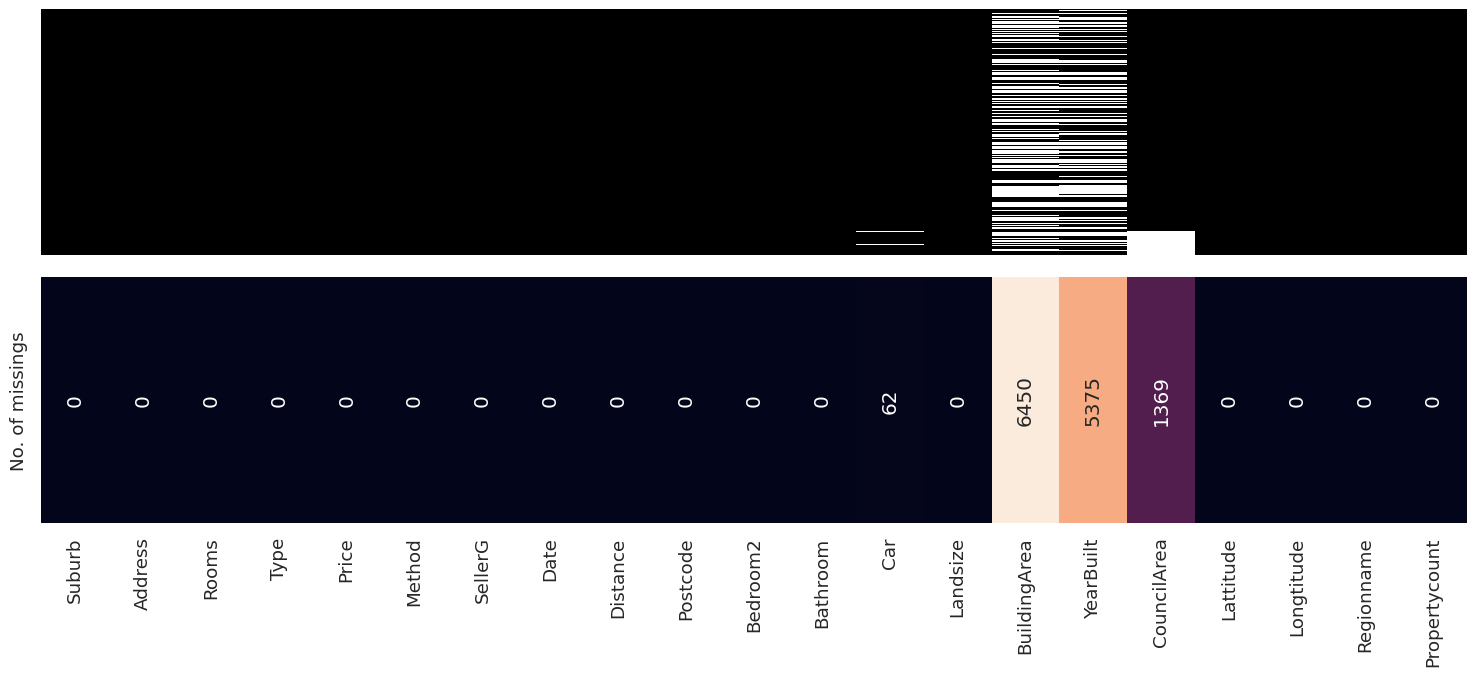

In [75]:
# Plot position of missing data by row and feature
fig, ax = plt.subplots(2,1,figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(),xticklabels=False,yticklabels = False, cbar = False ,ax=ax[0],cmap = 'Greys_r')
sns.heatmap(df.isnull().sum().to_frame(name="No. of missings").T,yticklabels = True, annot=True,cbar = False, fmt='d',annot_kws={"rotation":90},ax=ax[1])
fig.tight_layout()
plt.show()

### Data Cleaning and Handling Missing Values

The dataset does not contain duplicate entries, although duplicated listings are present and will be addressed in subsequent steps. This section focuses on handling missing values to ensure data quality and reliability for further analysis.

- **Car:** There are 62 missing values in the `Car` column. Since these constitute a small proportion of the dataset, rows with `NaN` values in this column will be dropped. This approach minimizes data loss while maintaining data integrity.
- **CouncilArea:** A block of records has missing values in the `CouncilArea` column. From the analysis of missing data positioning, it is observed that all missing values appear at the end of the dataset. While this pattern might suggest a systematic issue, such as a recording error, the exact cause remains unclear. Missing values in this column will be imputed during the initial data cleaning steps.
- **BuildingArea and YearBuilt:** Both columns contain a substantial number of missing values. Both these columns will be discarted.

In [5]:
# print(df.shape)
# Remove rows where 'Car' has missing (NaN) values
df = df.dropna(subset=['Car'])

# Remove rows where 'Bedroom2' has a value of 0
df = df[df['Bedroom2'] != 0]

# Drop BuildingArea and YearBuilt
df = df.drop(['BuildingArea', 'YearBuilt'], axis=1)
# print(df.shape)

## Duplicates
Possibly relisted companies. Removed both first and second listing record.

In [6]:
# Check for relisted properties with new price
relisted = df[df.duplicated(subset=['Suburb', 'Address'], keep=False)]

print(relisted.head(30))

# Print unique values of Type in relisted properties
print("Unique values in 'Type' column for relisted properties:")
print(relisted['Type'].unique())

# Count frequency of each value in the Type column for relisted properties
type_counts_relisted = relisted['Type'].value_counts()
print("\nFrequency of each value in the 'Type' column for relisted properties:")
print(type_counts_relisted)

# Remove all duplicates by Suburb and Address
df = df.drop_duplicates(subset=['Suburb', 'Address'], keep=False)
print("\nShape of DataFrame after removing duplicates:")
print(df.shape)

             Suburb             Address  Rooms Type    Price Method  \
39     Airport West       50 Bedford St      3    h   730000     VB   
40     Airport West       50 Bedford St      3    h   770000     SP   
188    Altona North     21 Hatherley Gr      3    h   750000     SP   
197    Altona North     21 Hatherley Gr      3    h   700000     VB   
292      Ascot Vale   75 Maribyrnong Rd      6    h  2425000     PI   
510          Balwyn      112 Belmore Rd      5    h  2570000     PI   
575          Balwyn      112 Belmore Rd      5    h  3020000     PI   
589    Balwyn North        30 Abbott St      7    h  1350000     PI   
605    Balwyn North     15 Ellendale St      3    t  1150000      S   
622    Balwyn North       41 Helston St      4    h  1800000     VB   
667    Balwyn North       41 Helston St      4    h  1900000     VB   
683    Balwyn North        30 Abbott St      5    h  1550000     VB   
684    Balwyn North     15 Ellendale St      3    h  1038000      S   
764   

# EDA

## Creating some new columns


In [7]:
df['LogPrice']=np.log(df['Price'])
df['Rooms/Distance']=df['Rooms']/df['Distance']
df['Distance^2']=df['Distance']**2
df['LogDistance']=np.log(df['Distance'])
df['LogRooms']=np.log(df['Rooms'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Descriptive Statistics
Both for Price/LogPrice and all the other numerica/categorical variables

In [8]:
print(df[['LogPrice','Price']].describe(),"\n")
print(df.describe())

           LogPrice         Price
count  13276.000000  1.327600e+04
mean      13.744689  1.075038e+06
std        0.526249  6.410310e+05
min       11.350407  8.500000e+04
25%       13.384728  6.500000e+05
50%       13.710150  9.000000e+05
75%       14.097677  1.326000e+06
max       16.012735  9.000000e+06 

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13276.000000  1.327600e+04  13276.000000  13276.000000  13276.000000   
mean       2.939440  1.075038e+06     10.193469   3105.790374      2.919479   
std        0.953033  6.410310e+05      5.879444     91.142671      0.958613   
min        1.000000  8.500000e+04      0.000000   3000.000000      1.000000   
25%        2.000000  6.500000e+05      6.200000   3046.000000      2.000000   
50%        3.000000  9.000000e+05      9.300000   3084.000000      3.000000   
75%        3.000000  1.326000e+06     13.000000   3149.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.00000

## Price Histograms

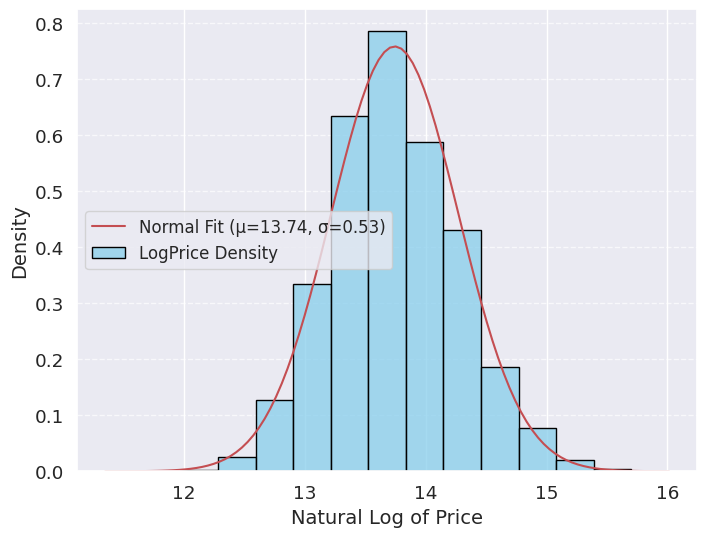

In [9]:
# Fit a normal distribution to the data
mean, std = norm.fit(df['LogPrice'])

# Plot the histogram of LogPrice
plt.figure(figsize=(8, 6))
sns.histplot(df['LogPrice'], kde=False, stat='density', bins=15, color='skyblue', edgecolor='black', label='LogPrice Density')

# Overlay the fitted normal distribution
x = np.linspace(df['LogPrice'].min(), df['LogPrice'].max(), 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r-', label=f'Normal Fit (μ={mean:.2f}, σ={std:.2f})')

# Add labels, legend, and grid
# plt.title('LogPrice Density with Fitted Normal Curve', fontsize=16)
plt.xlabel('Natural Log of Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('IMAGES/logprice_histogram.png', format='png', dpi=300)
plt.show()

## Histograms
Plotted only top 50 of Suburb and SellerG

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols=list(categorical_cols)
categorical_cols.remove('Address')
categorical_cols=pd.Index(categorical_cols)

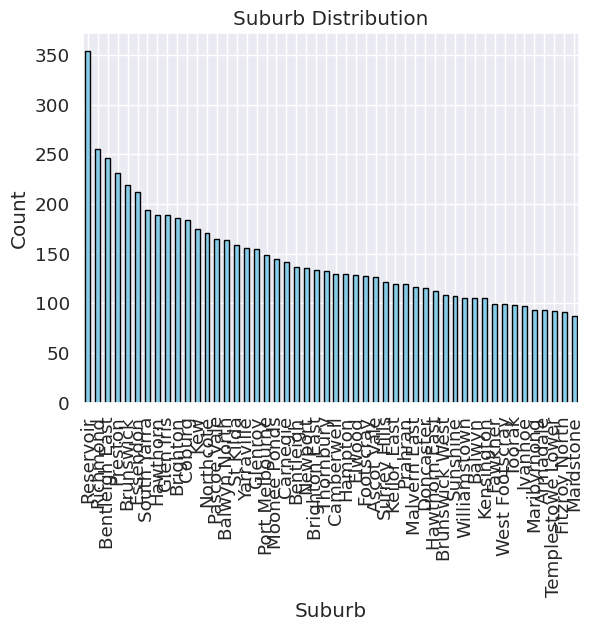

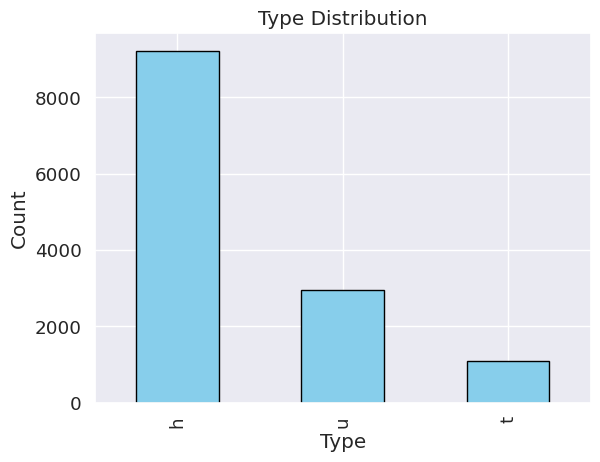

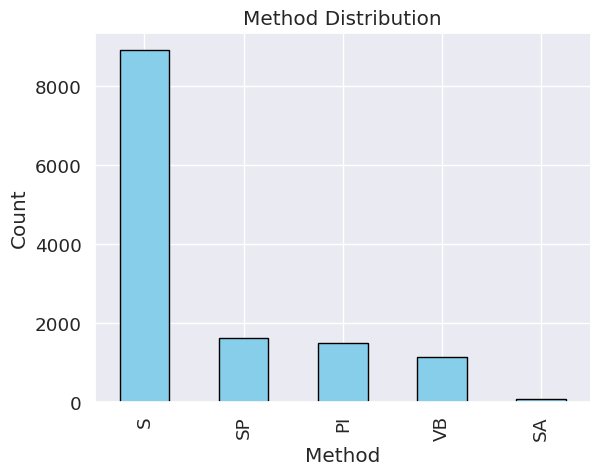

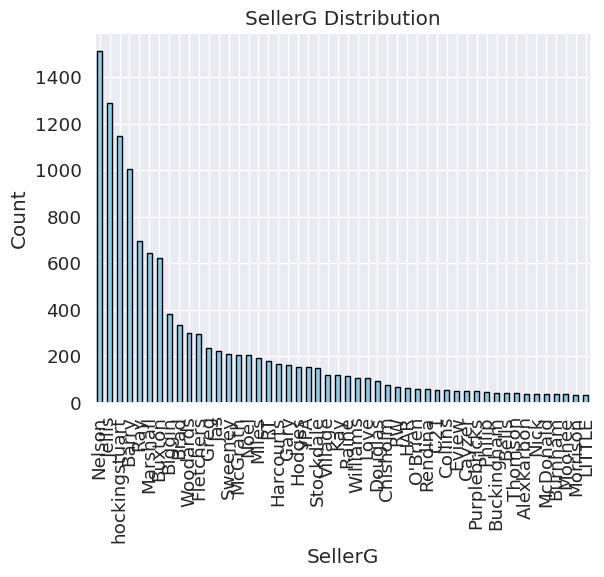

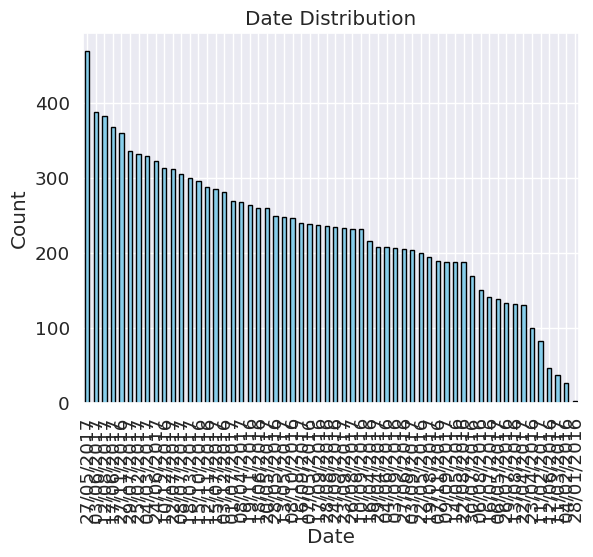

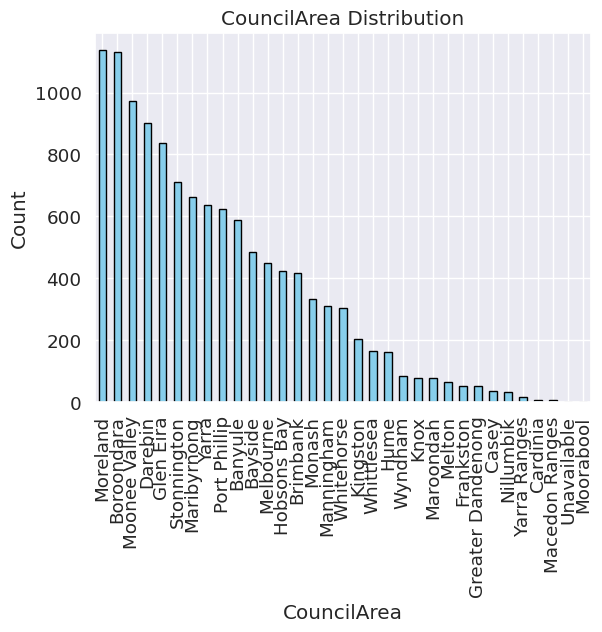

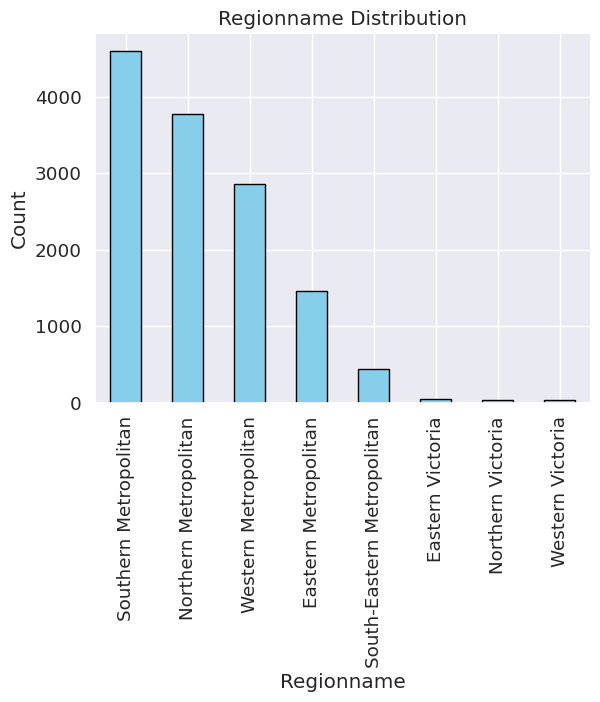

In [11]:
# Imbalance in Categorical Data
for col in categorical_cols:
    grouped=df[col].value_counts()
    if col in ['Suburb','SellerG']:
      grouped=grouped.sort_values(ascending=False).head(50)

    grouped.plot(kind='bar',color='skyblue',edgecolor='black')

    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## Pareto Principle for SellerG and Suburb
Showing the cumulative percentages of transactions count and total sales volume. Fundamentally, it aggregate at two different times with regard to SellerG and Suburb and then ic compute the cumulative starting from the highest proportion in each of the two groups and proceeding in descending order for the other proportions.

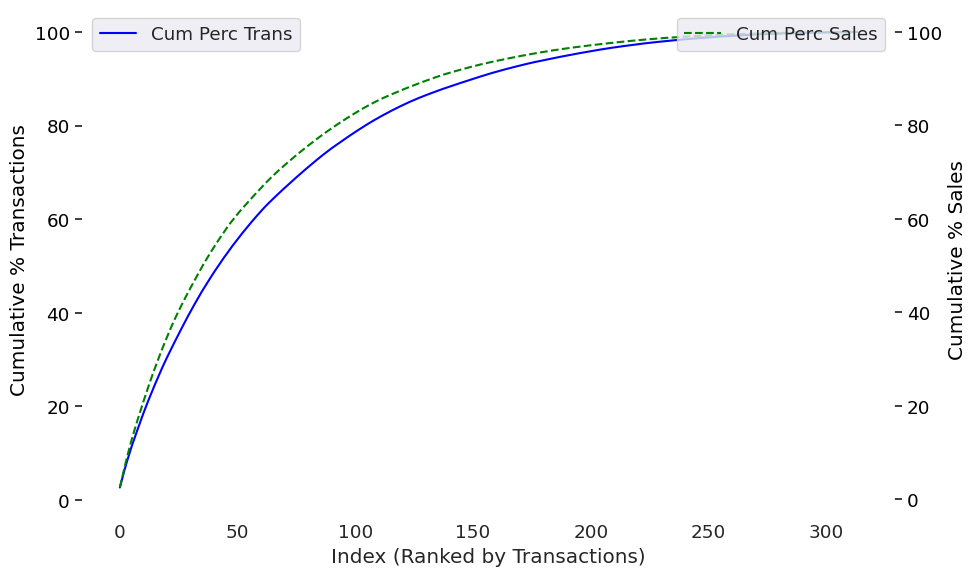

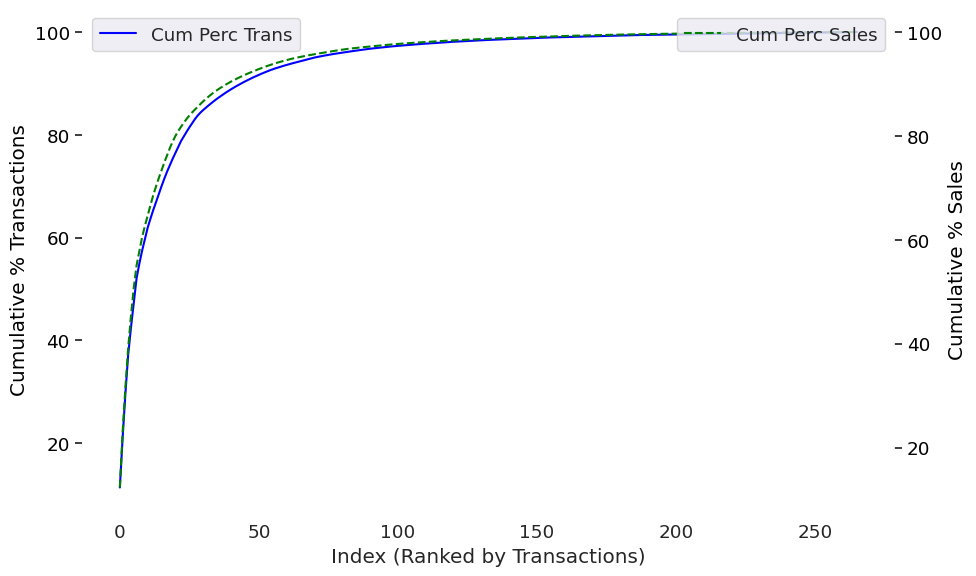

In [12]:
for col in ['Suburb', 'SellerG']:
    # Get cumulative percentage for transactions
    temp_series = df[col].value_counts().sort_values(ascending=False)
    cum_series = temp_series.cumsum()
    cum_series_perc = (cum_series / cum_series.iloc[-1]) * 100  # Normalize to 100%

    # Group by to calculate total sales and cumulative sales
    temp_sales = df.groupby(col)['Price'].sum().sort_values(ascending=False)
    cum_sales = temp_sales.cumsum()
    cum_sales_perc = (cum_sales / cum_sales.iloc[-1]) * 100  # Normalize to 100%

    # Reset index to keep x-axis consistent as row indices
    cum_series_perc.reset_index(drop=True, inplace=True)
    cum_sales_perc.reset_index(drop=True, inplace=True)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Set white background for the figure and axes
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')

    # Plot the cumulative percentage on the first y-axis
    ax1.plot(cum_series_perc.index, cum_series_perc.values, color='blue', label='Cum Perc Trans')
    ax1.set_xlabel("Index (Ranked by Transactions)")
    ax1.set_ylabel('Cumulative % Transactions', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Add a second y-axis for the sales percentage
    ax2 = ax1.twinx()
    ax2.plot(cum_sales_perc.index, cum_sales_perc.values, color='green', linestyle='--', label='Cum Perc Sales')
    ax2.set_ylabel('Cumulative % Sales', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.grid(False)  # Turn off the grid for the second axis

    # Add title and legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show plot
    plt.tight_layout()
    plt.savefig(f'IMAGES/{col}_cum_sales_trans.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()


## Pre-filtering Correlation Matrix

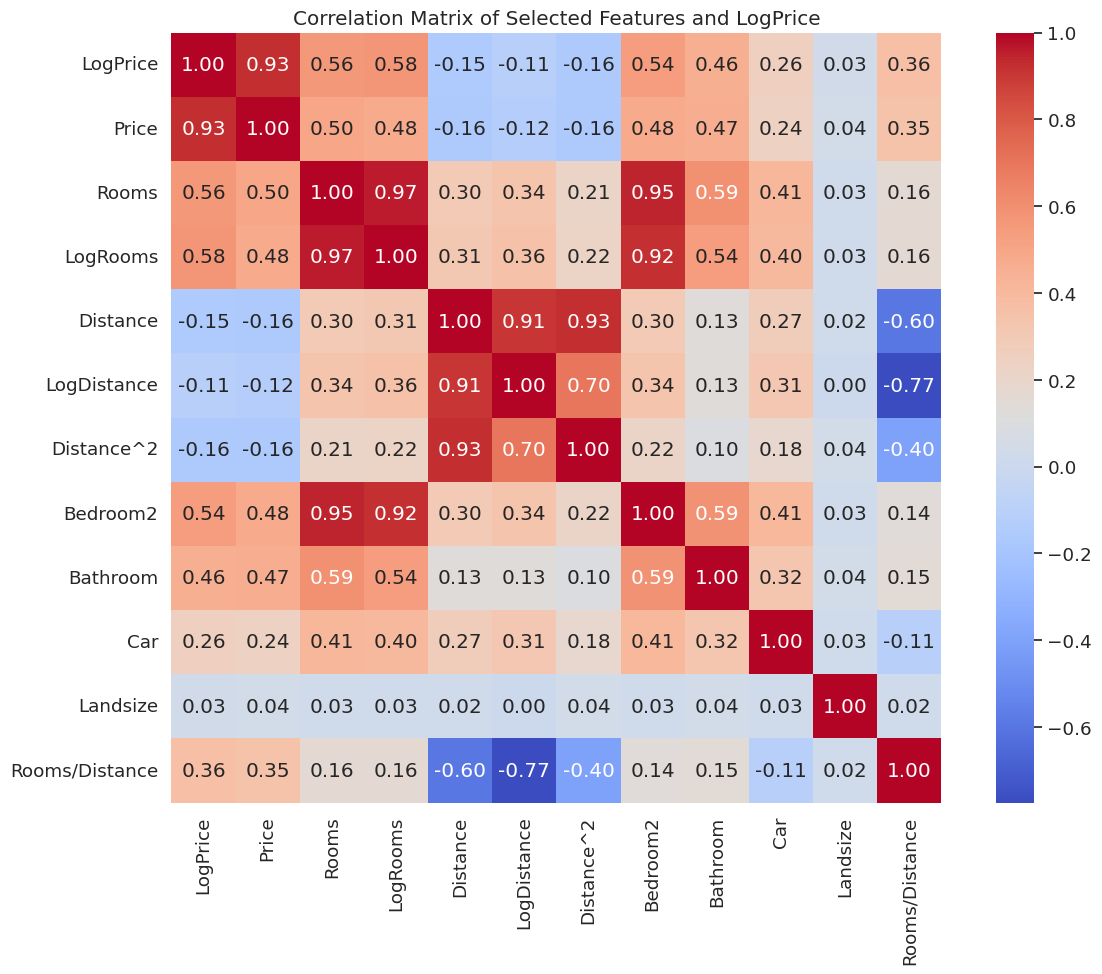

In [13]:
num_features = ['LogPrice','Price','Rooms','LogRooms', 'Distance','LogDistance','Distance^2', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','Rooms/Distance']

plt.figure(figsize=(14, 10))
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Features and LogPrice')
plt.show()

## Histogram of Landsize for Type

Quantiles 178.0 652.0
Whiskers: -533.0 1363.0


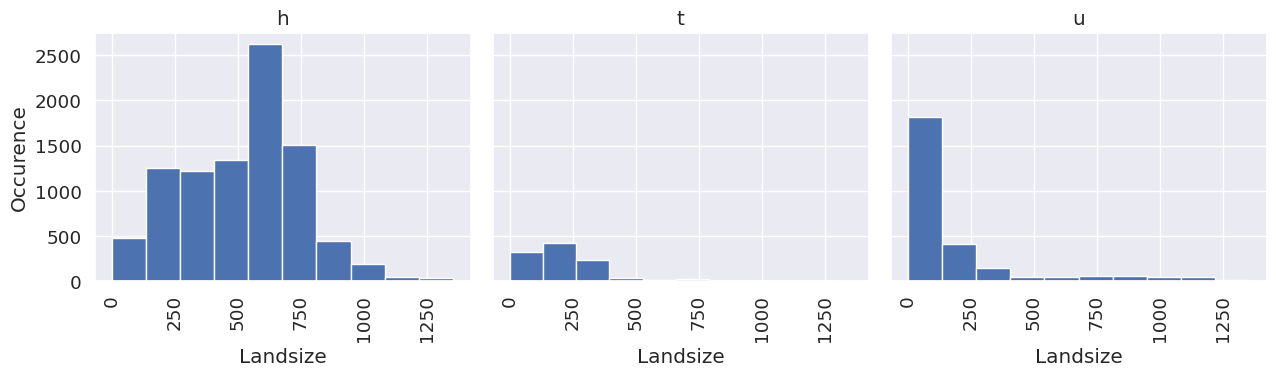

In [14]:
q1,q3 = tuple(df["Landsize"].quantile([.25,.75]).values)
print("Quantiles",q1,q3)
iqr = q3-q1
lower_whisker, upper_whisker = q1-1.5*iqr, q3+1.5*iqr
print("Whiskers:",lower_whisker, upper_whisker)

# Filter data
landsizes = df[(lower_whisker<df["Landsize"])&(df["Landsize"]<upper_whisker)]

fig, ax = plt.subplots(1,3,figsize=(13,4),sharex=True,sharey=True)
landsizes.hist(column="Landsize",by="Type",ax=ax)

for a in ax:
    a.set_xlabel("Landsize")
ax[0].set_ylabel("Occurence")
plt.tight_layout()

del landsizes

## Creating columns Month and Year

In [15]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

## Price and LogPrice Grouped by Month and Year

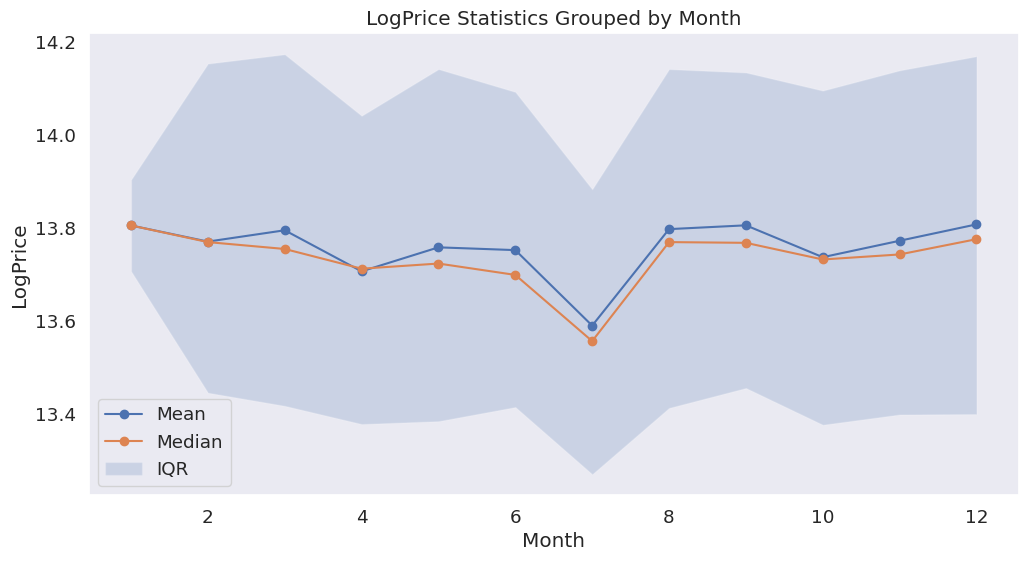

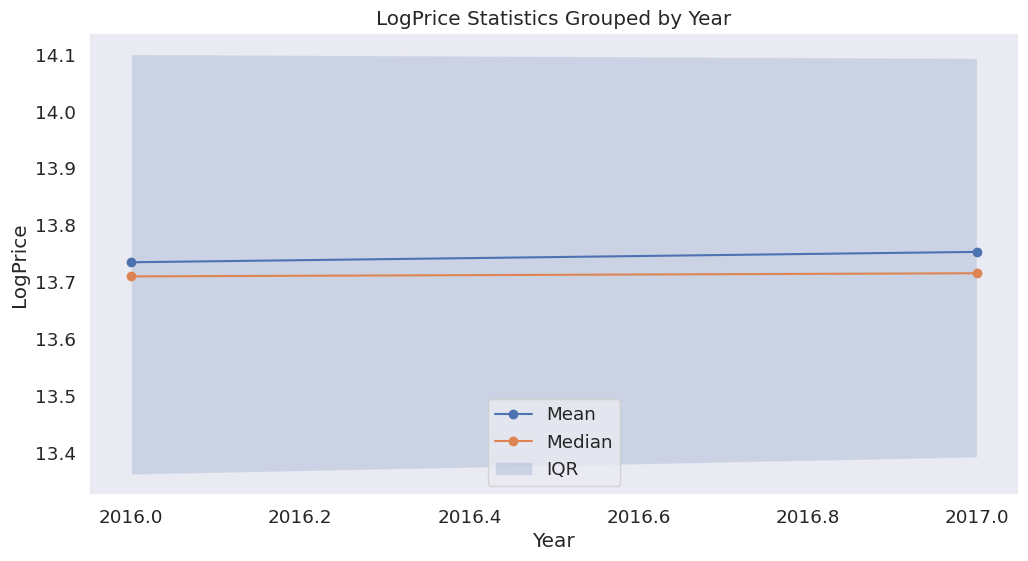

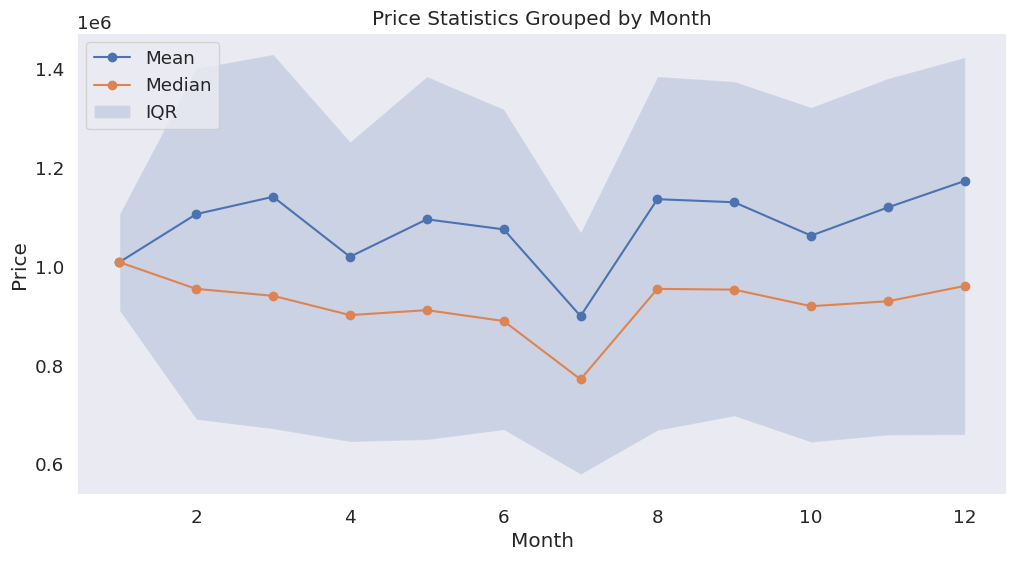

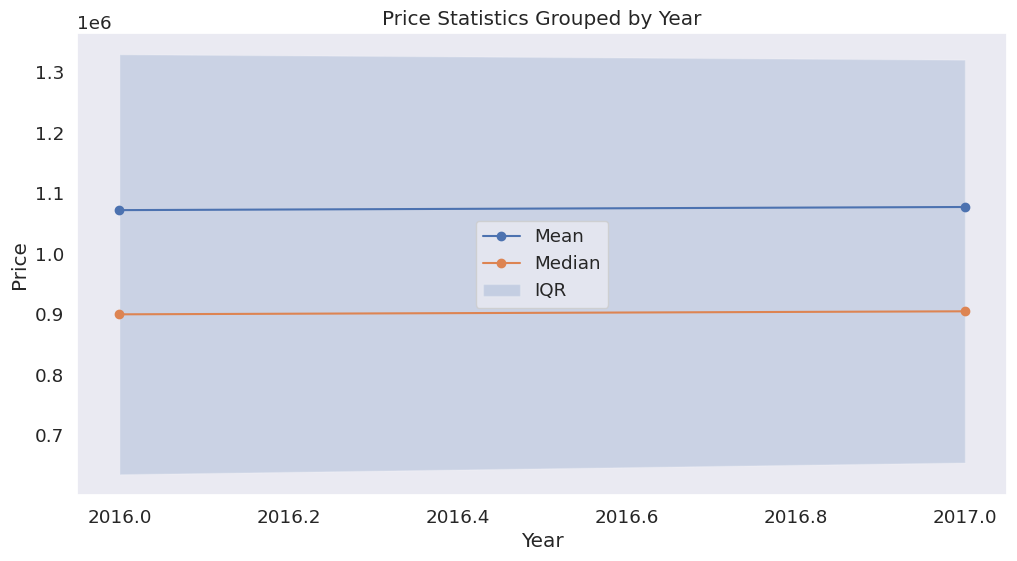

In [16]:
for col in ['LogPrice','Price']:
  # Group by Month and compute descriptive statistics
  month_stats = df.groupby('Month')[col].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
  month_stats.columns = ['Mean', 'Median', 'Q1', 'Q3']
  month_stats['IQR'] = month_stats['Q3'] - month_stats['Q1']

  # Plot for Month
  plt.figure(figsize=(12, 6))
  plt.plot(month_stats.index, month_stats['Mean'], label='Mean', marker='o')
  plt.plot(month_stats.index, month_stats['Median'], label='Median', marker='o')
  plt.fill_between(month_stats.index, month_stats['Q1'], month_stats['Q3'], alpha=0.2, label='IQR')
  plt.title(f'{col} Statistics Grouped by Month')
  plt.xlabel('Month')
  plt.ylabel(f'{col}')
  plt.legend()
  plt.grid()

  plt.savefig(f'IMAGES/{col}_grouped_month.png', dpi=300, bbox_inches='tight')

  plt.show()

  # Group by Year and compute descriptive statistics
  year_stats = df.groupby('Year')[col].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
  year_stats.columns = ['Mean', 'Median', 'Q1', 'Q3']
  year_stats['IQR'] = year_stats['Q3'] - year_stats['Q1']

  # Plot for Year
  plt.figure(figsize=(12, 6))
  plt.plot(year_stats.index, year_stats['Mean'], label='Mean', marker='o')
  plt.plot(year_stats.index, year_stats['Median'], label='Median', marker='o')
  plt.fill_between(year_stats.index, year_stats['Q1'], year_stats['Q3'], alpha=0.2, label='IQR')
  plt.title(f'{col} Statistics Grouped by Year')
  plt.xlabel('Year')
  plt.ylabel(f'{col}')
  plt.legend()
  plt.grid()

  plt.savefig(f'IMAGES/{col}_grouped_year.png', dpi=300, bbox_inches='tight')

  plt.show()

## Average Price per Year and Month

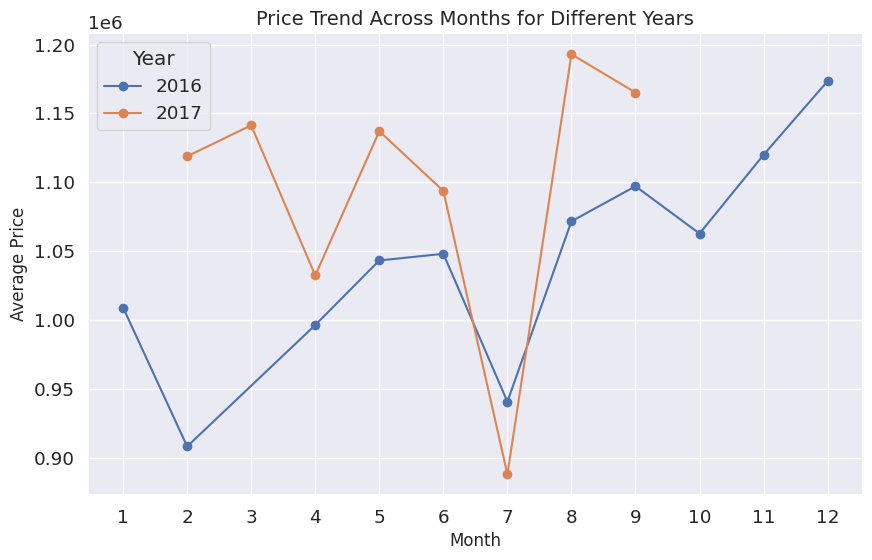

In [17]:
# Convert 'Year' and 'Month' columns to string for combined x-axis labeling
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

# Group the data by Year and Month, calculating the average price per month for each year
monthly_price_trend = df.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))

# Iterate over each unique year and plot the trend for that year
for year in monthly_price_trend['Year'].unique():
    year_data = monthly_price_trend[monthly_price_trend['Year'] == year]
    plt.plot(year_data['Month'], year_data['Price'], marker='o', label=str(year))

# Add titles and labels
plt.title('Price Trend Across Months for Different Years', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(range(1, 13))  # Ensure months are shown from 1 to 12
plt.legend(title="Year")

# Show the plot
plt.grid(True)

plt.savefig('IMAGES/average_price_months.png', dpi=300, bbox_inches='tight')

plt.show()


 ## Total Sales and Transactions for Month, Year

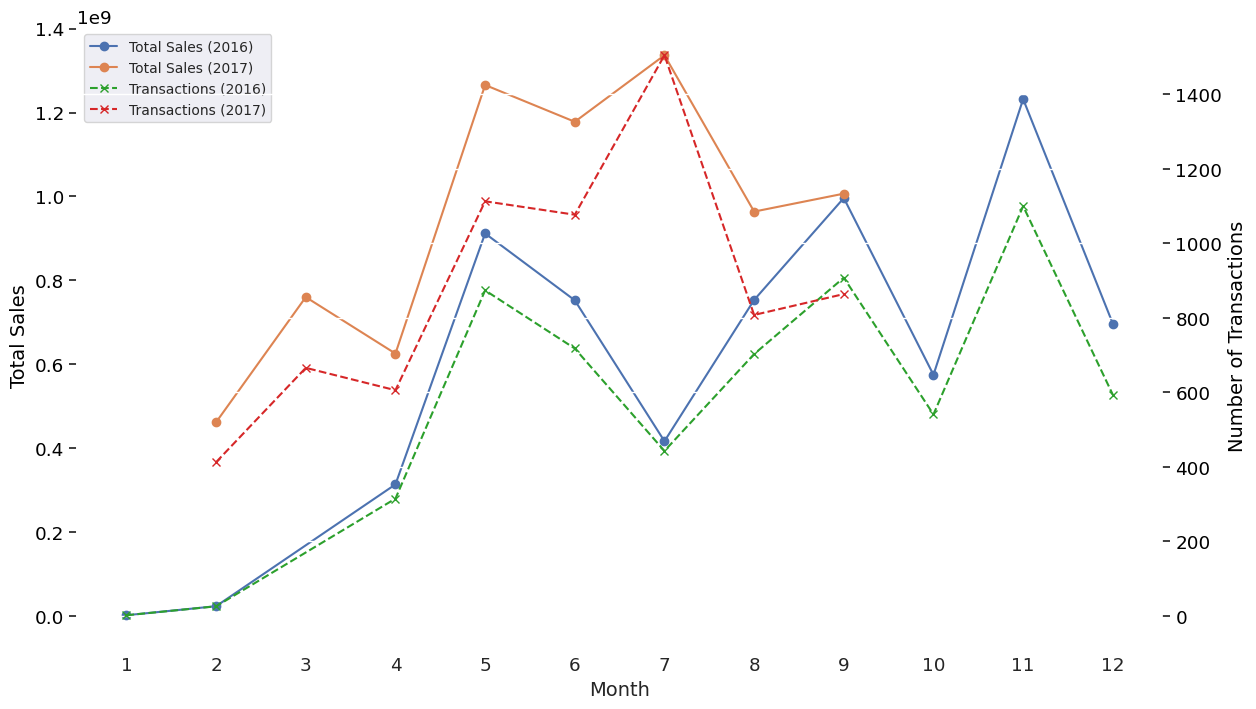

In [18]:
# Group the data by Year and Month, calculating the sum of sales and the number of transactions
monthly_sales = df.groupby(['Year', 'Month']).agg(
    total_sales=('Price', 'sum'),   # Sum of prices
    transaction_count=('Price', 'count')  # Count of rows
).reset_index()

# Plotting the trends
fig, ax1 = plt.subplots(figsize=(14, 8))

# Set white background for the figure and axes
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Plot total sales for each year
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    ax1.plot(year_data['Month'], year_data['total_sales'], marker='o', label=f"Total Sales ({year})")

# Customize the first axis
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Total Sales', fontsize=14, color='black')  # Axis label in black
ax1.tick_params(axis='y', labelcolor='black')  # Tick labels in black
ax1.set_xticks(range(1, 13))
ax1.grid(True, linestyle='--', alpha=0.7)

# Create the secondary y-axis for number of transactions
ax2 = ax1.twinx()
ax2.set_facecolor('white')  # Ensure the second axis also has a white background

# Plot transaction count for each year
for year in [2016, 2017]:  # Ensure years are integers to match the data type
    colo = 'tab:green' if year == 2016 else 'tab:red'  # Assign colors based on the year
    year_data = monthly_sales[monthly_sales['Year'] == year]
    ax2.plot(year_data['Month'], year_data['transaction_count'], marker='x', linestyle='--', label=f"Transactions ({year})", color=colo)

# Customize the second axis
ax2.set_ylabel('Number of Transactions', fontsize=14, color='black')  # Axis label in black
ax2.tick_params(axis='y', labelcolor='black')  # Tick labels in black

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# Save the plot with a white background
plt.savefig('IMAGES/monthly_sales_transactions.png', dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot
plt.show()

## Dropping previously created columns

In [19]:
df = df.drop(['Rooms/Distance', 'Distance^2', 'LogDistance', 'LogRooms'], axis=1)

# Missing Data

## Handling Missing Data in `CouncilArea`

The `CouncilArea` column contains missing values that need to be addressed to ensure data completeness and accuracy. To impute these missing values, we will leverage the relationship between `CouncilArea` and other geographical indicators, such as `Regionname`, `Postcode`, and `Suburb`. Properties that share these attributes are more likely to belong to the same `CouncilArea`, making this a logical basis for imputing the missing values.

#### Approach:

1. **Validation of Input Columns:**
   - Before proceeding, we will examine the unique values in `Regionname`, `Postcode`, and `Suburb` to ensure they do not contain erroneous or inconsistent entries. This step is crucial for maintaining the reliability of the grouping process.

2. **Imputation Strategy:**
   - Missing `CouncilArea` values will be assigned based on the most frequent `CouncilArea` within groups defined by combinations of `Regionname`, `Postcode`, and `Suburb`.
   - This grouping approach enhances the likelihood of accurately retrieving the missing `CouncilArea` values, as these attributes are strongly correlated with geographical regions.

This method will ensure a structured and informed approach to addressing missing data in `CouncilArea`, preparing the dataset for subsequent analyses.


### Check for unique value

In [20]:
# Check the number of unique values for Postcode, Regionname, Suburb and CouncilArea
print("Unique values count:")
print("Postcode:", df['Postcode'].nunique())
print("Regionname:", df['Regionname'].nunique())
print("Suburb:", df['Suburb'].nunique())
print("CouncilArea:", df['CouncilArea'].nunique())

# Display unique values for each column (optional for deeper inspection)
print("\nUnique Postcodes:", df['Postcode'].unique()[:10])  # Display first 10 unique postcodes
print("\nUnique Regionnames:", df['Regionname'].unique())
print("\nUnique Suburbs:", df['Suburb'].unique()[:10])  # Display first 10 unique suburbs
print("\nUnique CouncilArea:", df['CouncilArea'].unique())  # Display unique council areas

Unique values count:
Postcode: 198
Regionname: 8
Suburb: 314
CouncilArea: 33

Unique Postcodes: [3067 3042 3206 3078 3018 3025 3143 3032 3147 3034]

Unique Regionnames: ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']

Unique Suburbs: ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood']

Unique CouncilArea: ['Yarra' 'Moonee Valley' 'Port Phillip' 'Darebin' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse'
 'Maribyrnong' 'Bayside' 'Moreland' 'Manningham' 'Banyule' 'Melbourne'
 'Kingston' 'Brimbank' 'Hume' nan 'Knox' 'Maroondah' 'Casey' 'Melton'
 'Greater Dandenong' 'Nillumbik' 'Whittlesea' 'Frankston' 'Macedon Ranges'
 'Yarra Ranges' 'Wyndham' 'Cardinia' 'Unavailable' 'Moorabool']


**Check for uniques frequencies in `CouncilArea`**

In [21]:
# Print unique CouncilArea values with their frequencies
print("CouncilArea Value Counts:")
print(df['CouncilArea'].value_counts())

CouncilArea Value Counts:
CouncilArea
Moreland             1136
Boroondara           1132
Moonee Valley         972
Darebin               901
Glen Eira             836
Stonnington           711
Maribyrnong           662
Yarra                 638
Port Phillip          623
Banyule               589
Bayside               486
Melbourne             449
Hobsons Bay           423
Brimbank              417
Monash                333
Manningham            311
Whitehorse            304
Kingston              205
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              35
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64


**Replacing NA values in 'CouncilArea'**

In [22]:
# Convert 'Unavailable' values in 'CouncilArea' column to NaN
df['CouncilArea'] = df['CouncilArea'].replace('Unavailable', np.nan)

### Imputing Council Area
We adopted a grouping strategy to impute missing `CouncilArea` values based on the mode within groups defined by `Regionname`, `Postcode`, and `Suburb`. This approach ensures high precision, as `CouncilArea` has only 33 unique values compared to the hundreds in `Postcode` and `Suburb`.

Seven unresolved rows, representing a negligible fraction of the dataset, will be dropped. This method maintains consistency and reliability, leveraging strong geographical relationships for accurate imputation.


In [23]:
# Check rows with missing CouncilArea
print(df.shape)
missing_council = df['CouncilArea'].isna()
print(f"Missing CouncilArea values before: {missing_council.sum()}")

# Combine Suburb, Postcode, and Regionname for CouncilArea imputation
grouping_columns = ['Suburb', 'Postcode', 'Regionname']

# Function to fill missing CouncilArea using mode
def fill_councilarea(group):
    mode_value = group['CouncilArea'].mode()
    if not mode_value.empty:
        group = group.copy()  # Avoid modifying group in-place
        group['CouncilArea'] = group['CouncilArea'].fillna(mode_value[0])
    return group

# Group, apply the function, and then reset the index
df_filled = df.groupby(grouping_columns, group_keys=False).apply(fill_councilarea)

# Check rows with missing CouncilArea after filling
missing_council_after = df_filled['CouncilArea'].isna()
print(f"Missing CouncilArea values after: {missing_council_after.sum()}")

(13276, 23)
Missing CouncilArea values before: 1293
Missing CouncilArea values after: 7


<ipython-input-23-66d5150f81d0>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(grouping_columns, group_keys=False).apply(fill_councilarea)


**Dropping the `NA` values from `CouncilArea`**

In [24]:
# Drop rows where 'CouncilArea' has missing (NaN) values
df_filled = df_filled.dropna(subset=['CouncilArea'])
print(df_filled.shape)

(13269, 23)


In [25]:
df_filled.to_csv('unfiltered_housing.csv')

# Filtering

## Spatial Filtering
We will filter for a minimum number of observation is the following three categories:
- `Suburb`: minumum 50 observations
- `CouncilArea`: minimum 100 observations
- `Regionname`: minimum 100 observations

Erasing the `Method_SA` for lack of enough observations

In [26]:
# def filtering_min_obs(data, col):
#     init_count = data.shape[0]
#     grouped = data.groupby(by=col).size().reset_index(name='cnt')
#     print(f"Counts for {col}:\n", grouped.sort_values('cnt'), "\n")

#     if col=='Suburb':
#       filtered = grouped[grouped['cnt'] > 50]
#     else:
#       filtered = grouped[grouped['cnt'] > 100]
#     to_include = filtered[col].tolist()
#     result = data[data[col].isin(to_include)]

#     print(f"Rows removed for {col}: {init_count - result.shape[0]}","\n")
#     return result

# var_list=['Suburb','CouncilArea','Regionname']

# df_filtered=df_filled.copy()
# print(df_filtered.shape)

# for var in var_list:
#   df_filtered=filtering_min_obs(df_filtered,var)

# df_filtered=df_filtered[df_filtered['Method']!='SA']

# print(df_filtered.shape)

## Removing `Landsize` Outliers

In [27]:
df_filtered=df_filled.copy()
df_filtered=df_filtered[df_filtered['Landsize']<1000]
print(df_filtered.shape)

(12614, 23)


### Checking for missing values

In [28]:
# Print the count of missing values per column in df_filtered
missing_values = df_filtered.isna().sum()

# Display the result
print(missing_values)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
LogPrice         0
Year             0
Month            0
YearMonth        0
dtype: int64


# Saving the filtered dataset

In [29]:
print(df_filtered.shape)
df_filtered.to_csv('filtered_housing.csv', index=False)

(12614, 23)


# Encoding

**From Date to Week, Month, and Year**

To explore potential time trends or seasonality, the `Date` column was further refined into separate features for `Week`, `Month`, and `Year`. Since the dataset spans only two years, any time-based patterns or seasonality are likely to emerge within months.

**Key Steps:**
1. **Feature Engineering:**
   - Extracted `Week`, `Month`, and `Year` from the `Date` column.
   - Retained the original `Date` column to preserve row ordering and ensure temporal consistency.

2. **Time Trend Analysis:**
   - Focused primarily on `Month` to identify recurring trends or seasonality.
   - Planned for potential time-related feature incorporation in machine learning models.

3. **ML Implementation:**
   - Ensured that time-based features are appropriately structured to avoid introducing bias or inconsistency in predictive models.

This refinement supports the study of temporal patterns and ensures consistency when leveraging time-related information in subsequent analyses.

In [30]:
# Ensure 'Date' is in datetime format
# df_encoded =pd.read_csv('filtered_housing.csv')
df_encoded=df_filtered.copy()
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'], format='%Y-%m-%d', errors='coerce')

# Douple check Extract Year and Month
df_encoded['Year'] = df_encoded['Date'].dt.year
df_encoded['Month'] = df_encoded['Date'].dt.month

# Create a Week column based on the day of the month
# Week divisions: 1-7 (Week 1), 8-14 (Week 2), 15-21 (Week 3), 22+ (Week 4).
def week(w):
    if 1 <= w <= 7:
        return 1
    elif 8 <= w <= 14:
        return 2
    elif 15 <= w <= 21:
        return 3
    else:
        return 4

df_encoded['Week'] = df_encoded.Date.dt.day.apply(week)

# Drop the original 'Date' column
# df_encoded = df_encoded.drop('Date', axis=1)

In [31]:
# Print the column data types of df_filtered
print(df_encoded.dtypes)
print(df_encoded.head(10))
print(df_encoded.shape)

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                     int64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                     float64
Landsize                  int64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int64
LogPrice                float64
Year                      int32
Month                     int32
YearMonth                object
Week                      int64
dtype: object
       Suburb             Address  Rooms Type    Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000      S  Biggin   

## Saving the encoded data

In [32]:
df_encoded.to_csv('encoded_housing.csv')

 # EDA ON ENCODED DATA

In [33]:
# data=pd.read_csv('encoded_housing.csv')
data=df_encoded.copy()

In [34]:
print(data.head(10),"\n")
print(data.dtypes)

       Suburb             Address  Rooms Type    Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000      S  Biggin   

        Date  Distance  Postcode  ...  CouncilArea  Lattitude  Longtitude  \
0 2016-12-03       2.5      3067  ...        Yarra   -37.7996    144.9984   
1 2016-02-04       2.5      3067  ...     

In [35]:
data.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                     int64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                     float64
Landsize                  int64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int64
LogPrice                float64
Year                      int32
Month                     int32
YearMonth                object
Week                      int64
dtype: object

## Creating new columns

In [36]:
data['LogPrice']=np.log(data['Price'])
data['Rooms/Distance']=data['Rooms']/data['Distance']
data['Distance^2']=data['Distance']**2
data['LogDistance']=np.log(data['Distance'])
data['LogRooms']=np.log(data['Rooms'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Creating encoded Columns for 'object' type columns

In [37]:
# Columns to encode
columns_to_encode = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

# Initialize LabelEncoder
label_encoders = {}

# Apply Label Encoding and create new columns
for column in columns_to_encode:
    le = LabelEncoder()
    encoded_column_name = f"{column}_encoded"
    data[encoded_column_name] = le.fit_transform(data[column])
    label_encoders[column] = le

print(data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'LogPrice', 'Year', 'Month', 'YearMonth', 'Week',
       'Rooms/Distance', 'Distance^2', 'LogDistance', 'LogRooms',
       'Suburb_encoded', 'Address_encoded', 'Type_encoded', 'Method_encoded',
       'SellerG_encoded', 'CouncilArea_encoded', 'Regionname_encoded'],
      dtype='object')


## Selecting Features

In [38]:
selected_features = [
    'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','Type','Regionname', 'Month','Year'
]

In [39]:
print(data['Rooms'])

0        2
1        2
2        3
3        3
4        4
        ..
13575    4
13576    3
13577    3
13578    4
13579    4
Name: Rooms, Length: 12614, dtype: int64


## Scatter Plot: LogPrice and Selected Features

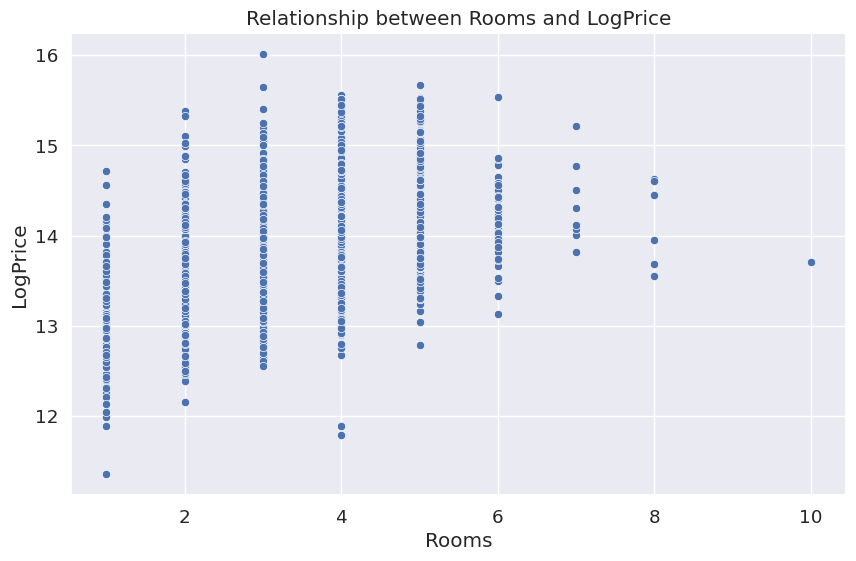

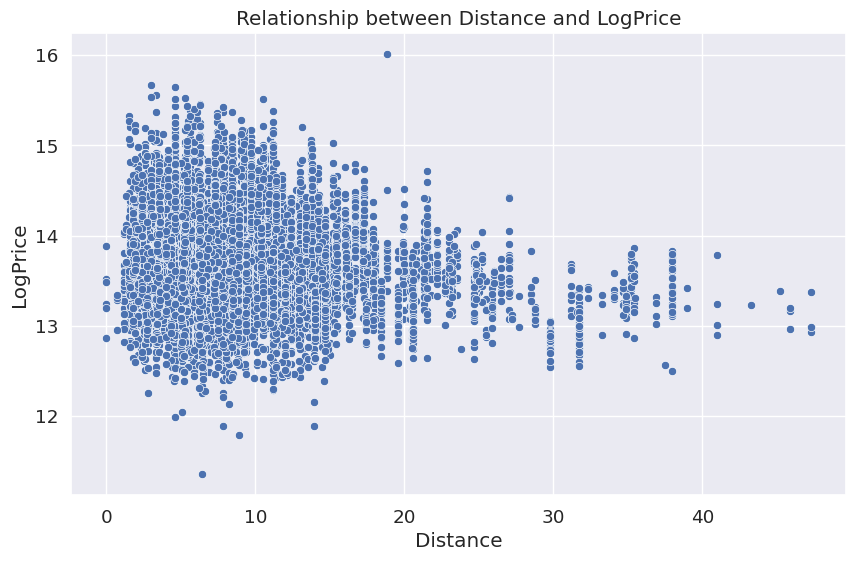

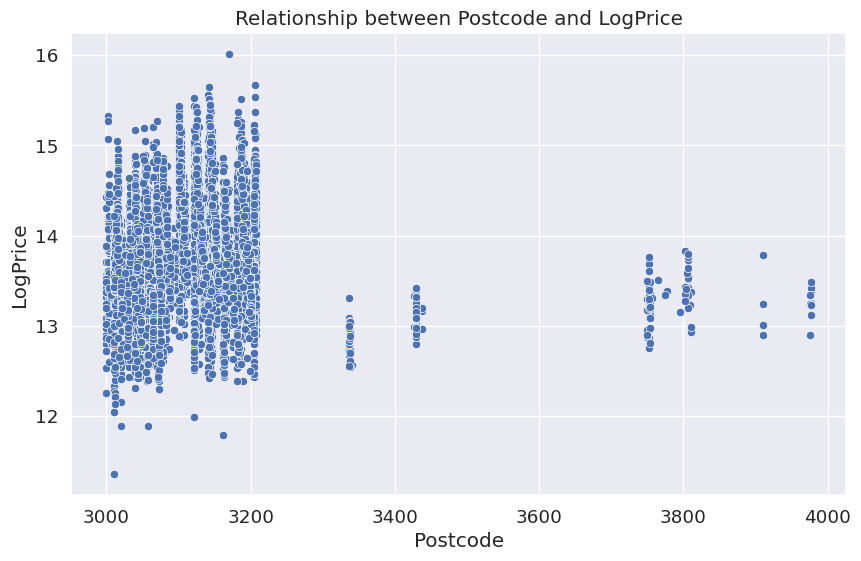

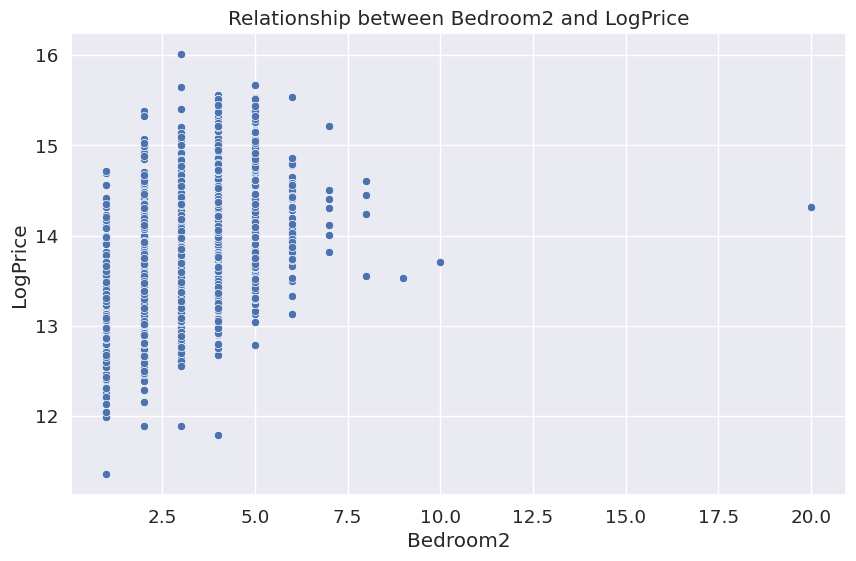

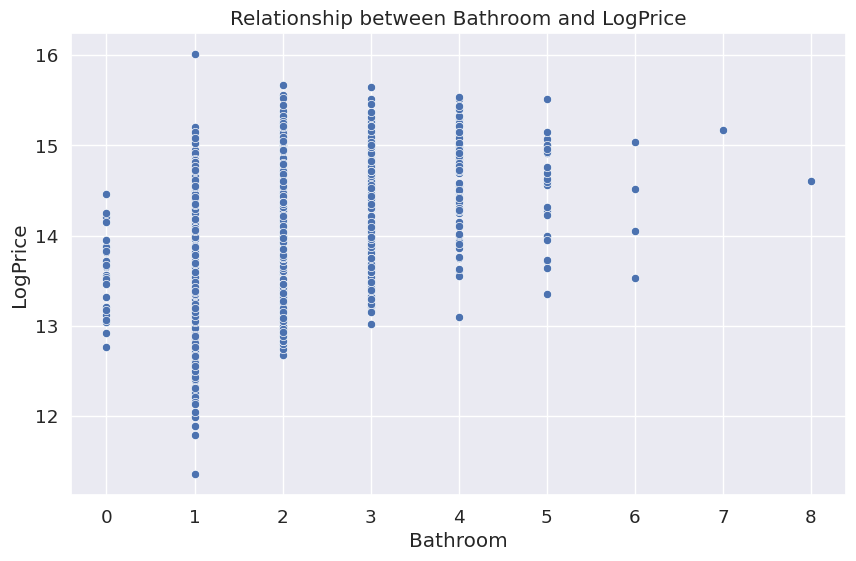

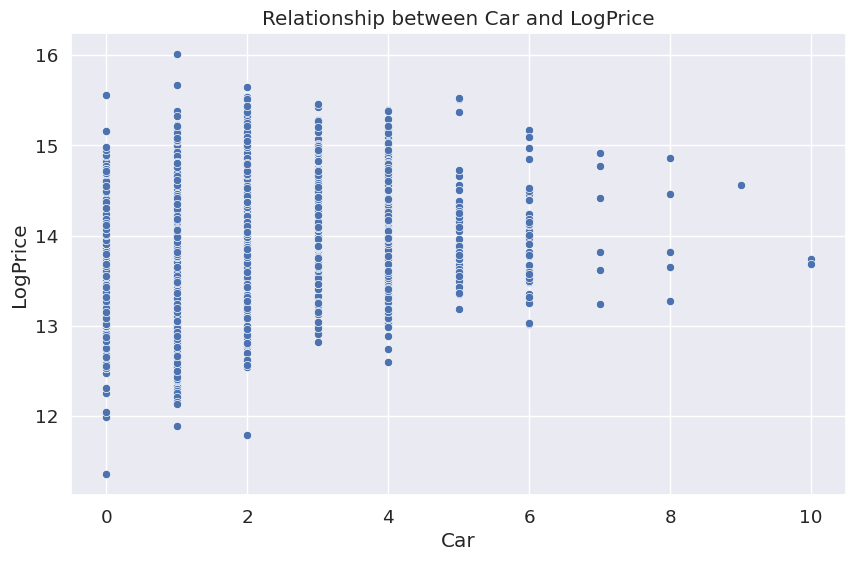

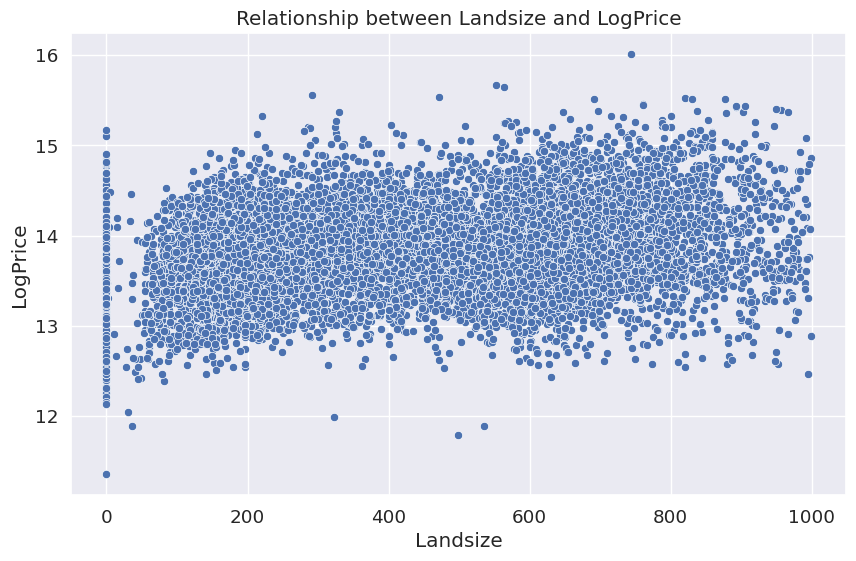

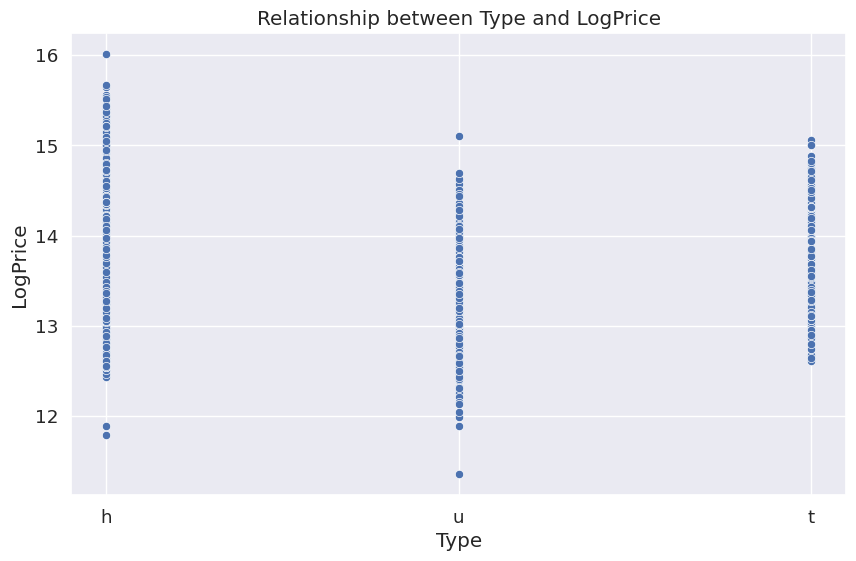

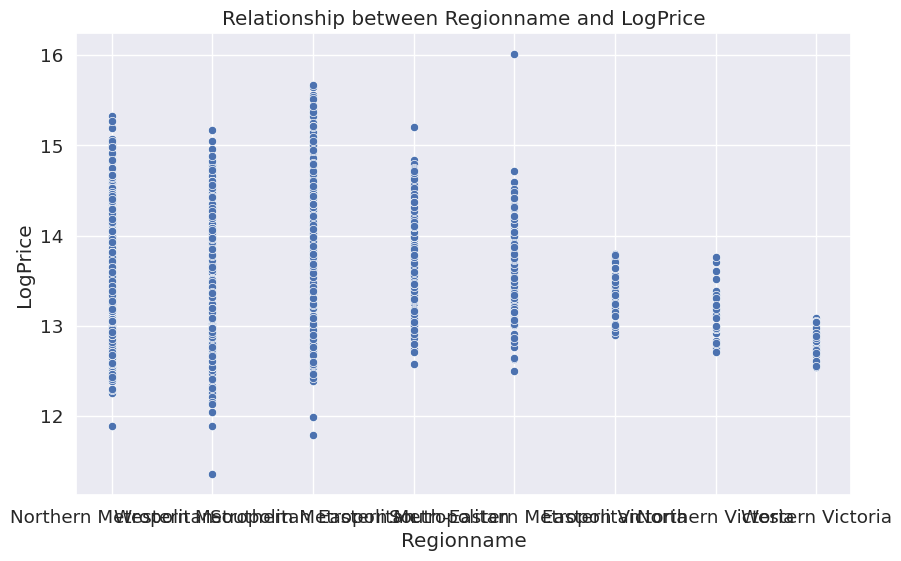

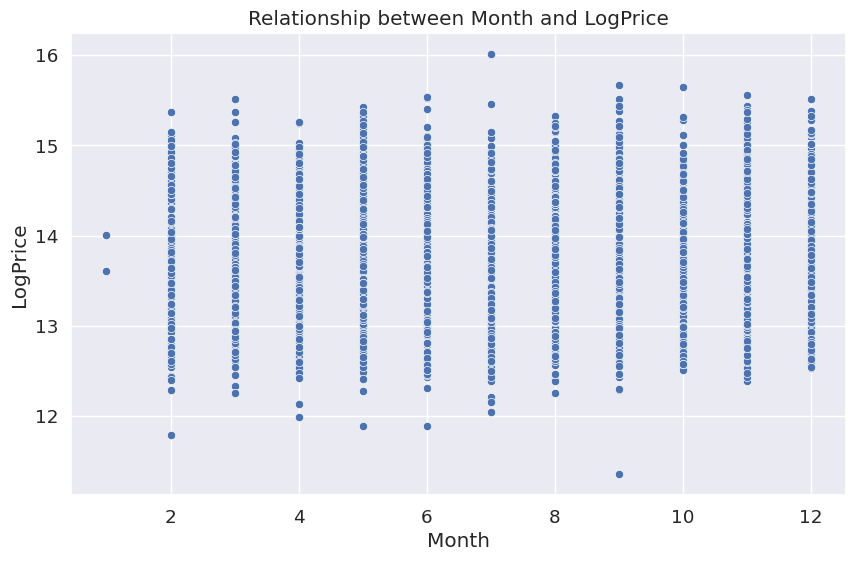

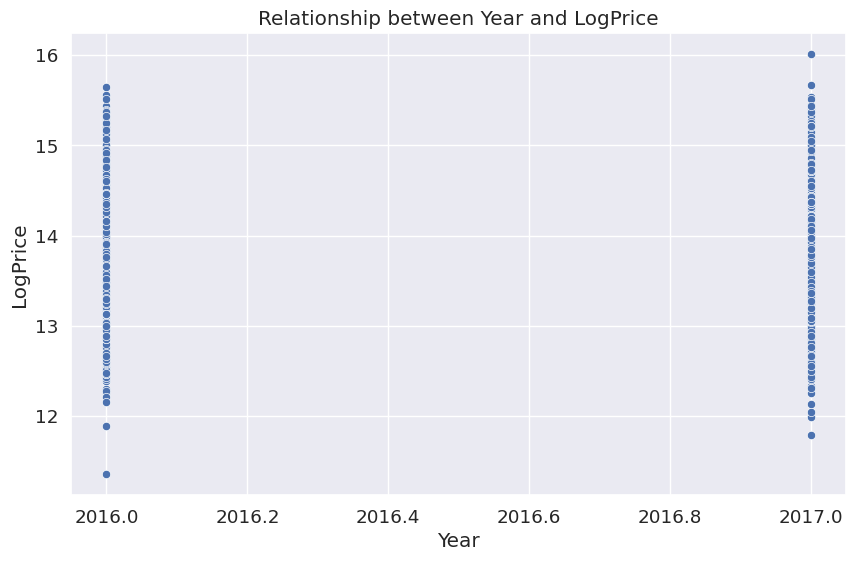

In [40]:
# Visualizing relationships with target
if 'LogPrice' in data.columns:
    for feature in selected_features:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[feature], y=data['LogPrice'])
        plt.title(f'Relationship between {feature} and LogPrice')
        plt.show()

## Correlation Analysis

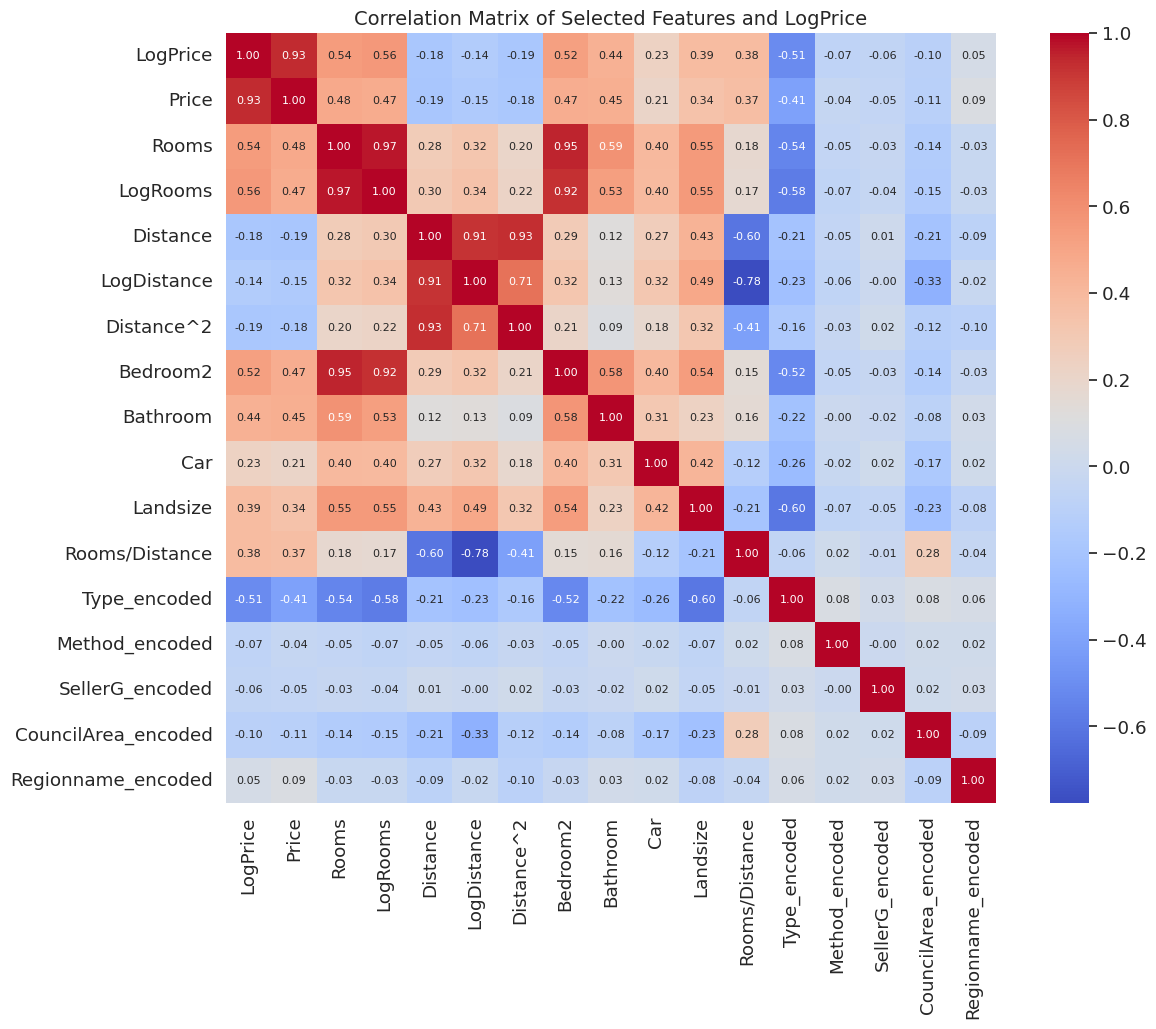

In [41]:
# Define the numerical features for the correlation matrix
num_features = ['LogPrice', 'Price', 'Rooms', 'LogRooms', 'Distance', 'LogDistance',
                'Distance^2', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
                'Rooms/Distance', 'Type_encoded', 'Method_encoded',
                'SellerG_encoded', 'CouncilArea_encoded', 'Regionname_encoded']

# Set the figure size
plt.figure(figsize=(14, 10))

# Compute the correlation matrix
correlation_matrix = data[num_features].corr()

# Create the heatmap with smaller annotation font size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            annot_kws={"size": 8})  # Reduce annotation font size to 8

# Add the title
plt.title('Correlation Matrix of Selected Features and LogPrice', fontsize=14)

# Show the plot
plt.show()


## Statistical Summary

In [42]:
# Statistical Summary of Target
print(data[['LogPrice','Price']].describe())

           LogPrice         Price
count  12614.000000  1.261400e+04
mean      13.746738  1.070406e+06
std        0.516358  6.164316e+05
min       11.350407  8.500000e+04
25%       13.387224  6.516250e+05
50%       13.716795  9.060000e+05
75%       14.096923  1.325000e+06
max       16.012735  9.000000e+06


In [43]:
# Statistical summary
print("\nStatistical Summary of Selected Features:")
print(data[selected_features].describe())


Statistical Summary of Selected Features:
              Rooms      Distance      Postcode      Bedroom2      Bathroom  \
count  12614.000000  12614.000000  12614.000000  12614.000000  12614.000000   
mean       2.947439     10.191303   3104.579673      2.926510      1.528064   
std        0.935574      5.708821     89.374799      0.940339      0.680310   
min        1.000000      0.000000   3000.000000      1.000000      0.000000   
25%        2.000000      6.300000   3044.000000      2.000000      1.000000   
50%        3.000000      9.400000   3084.000000      3.000000      1.000000   
75%        3.000000     13.000000   3148.000000      3.000000      2.000000   
max       10.000000     47.300000   3977.000000     20.000000      8.000000   

                Car      Landsize         Month          Year  
count  12614.000000  12614.000000  12614.000000  12614.000000  
mean       1.604329    399.535912      7.063263   2016.523862  
std        0.944097    270.152294      2.541615      

## Distributions of Numerical Variables

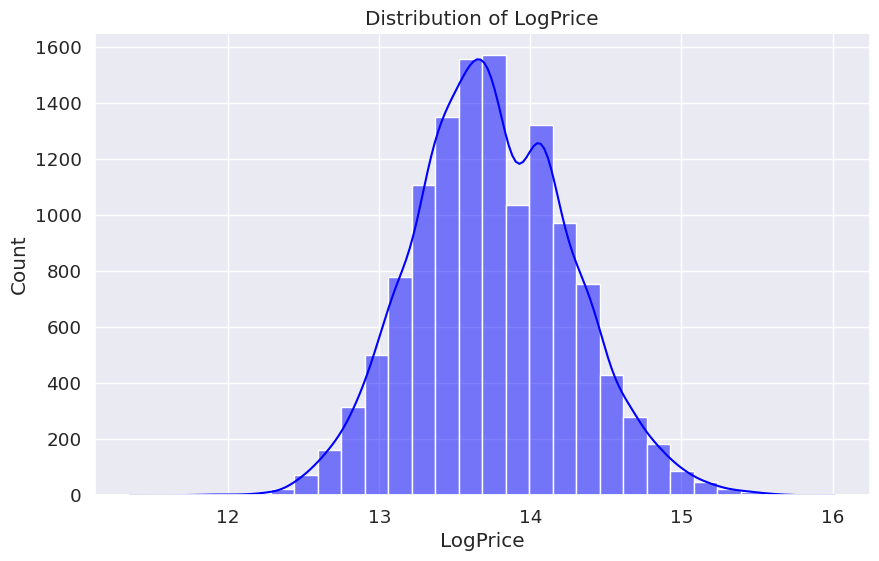

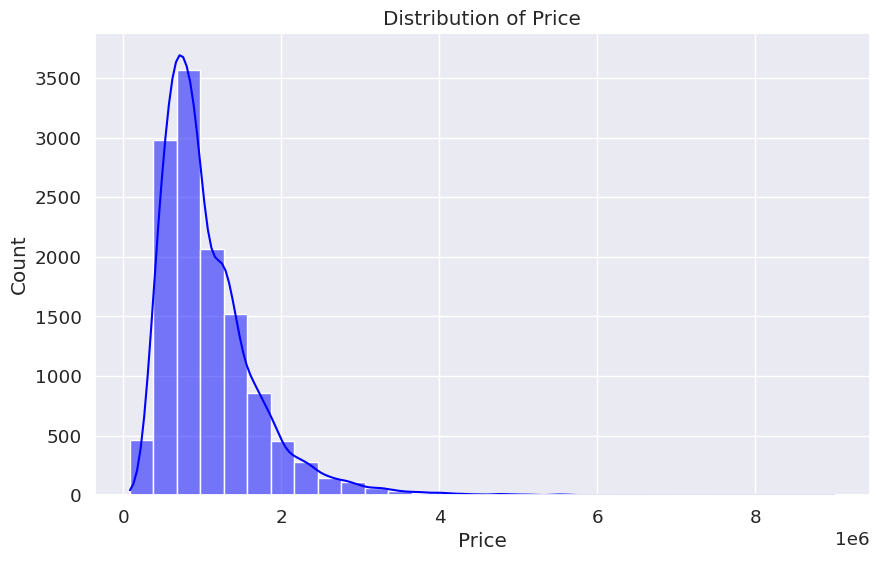

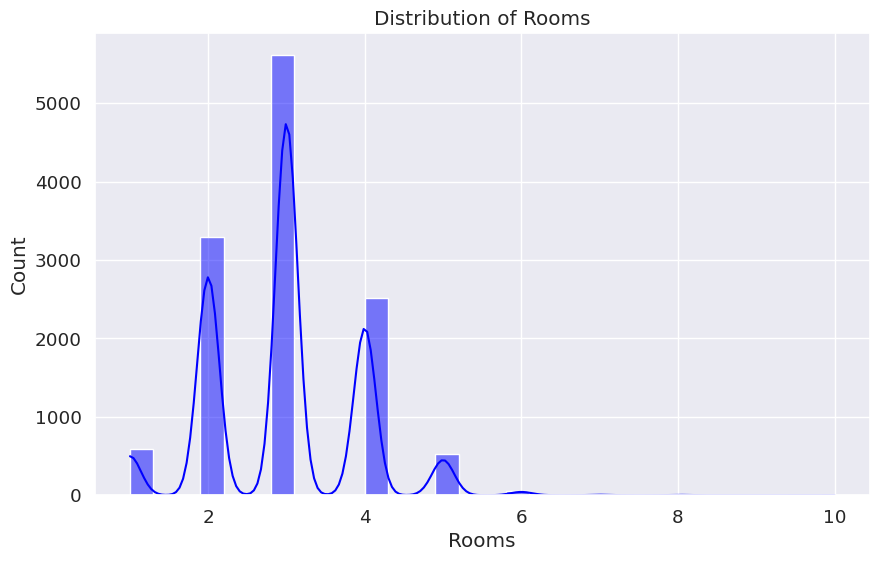

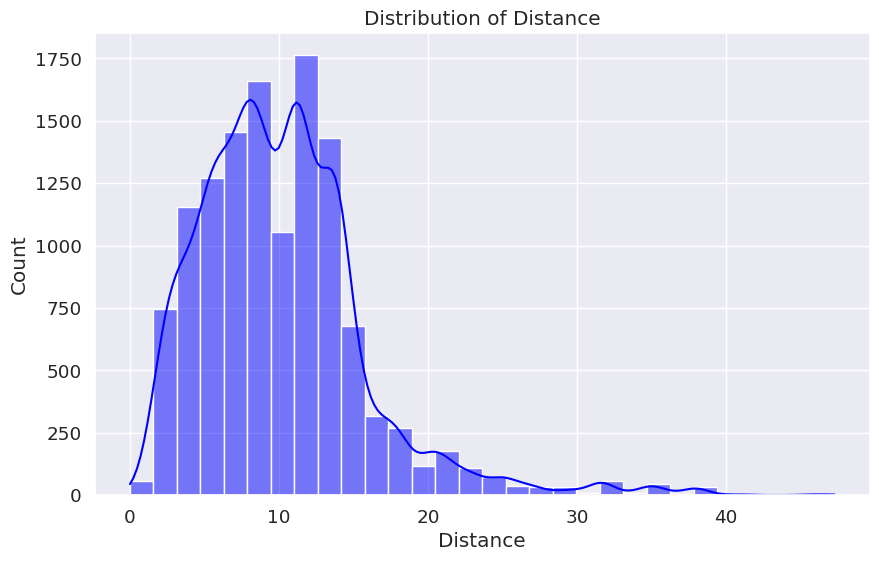

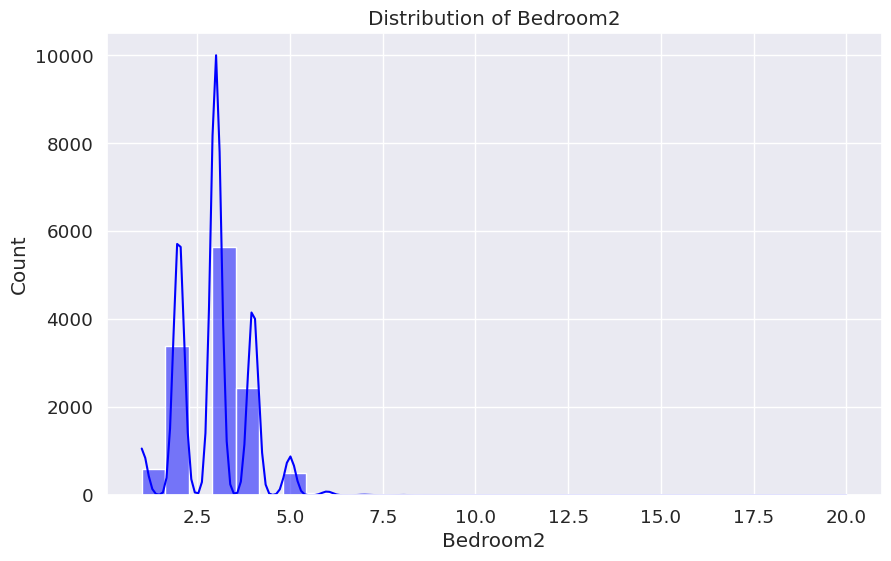

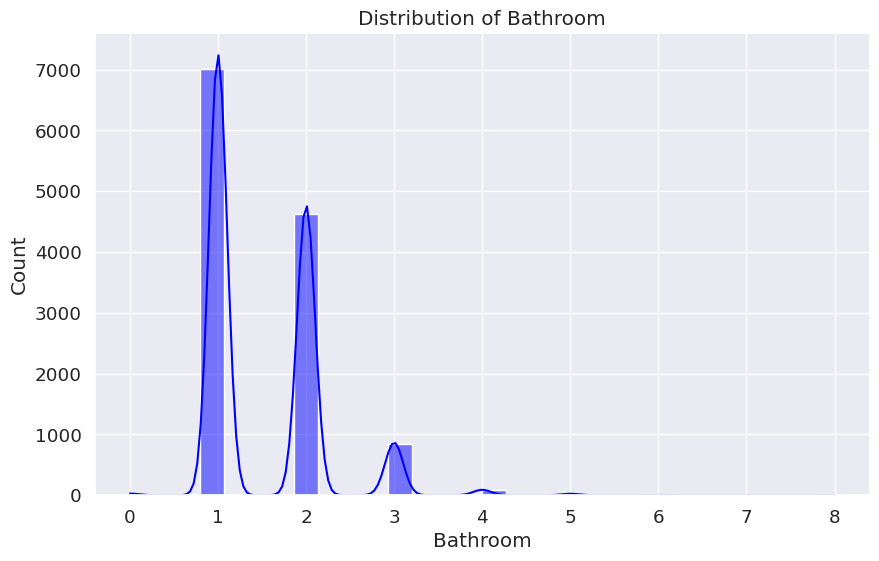

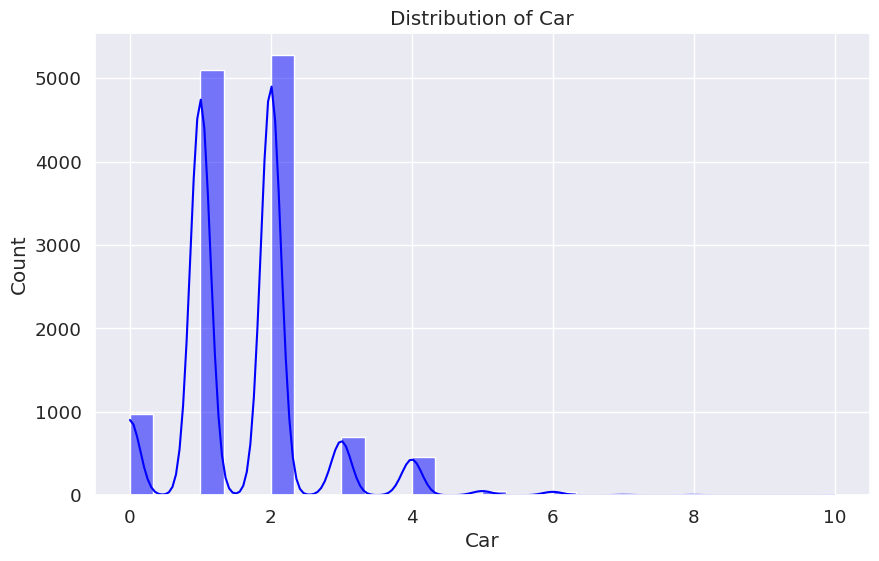

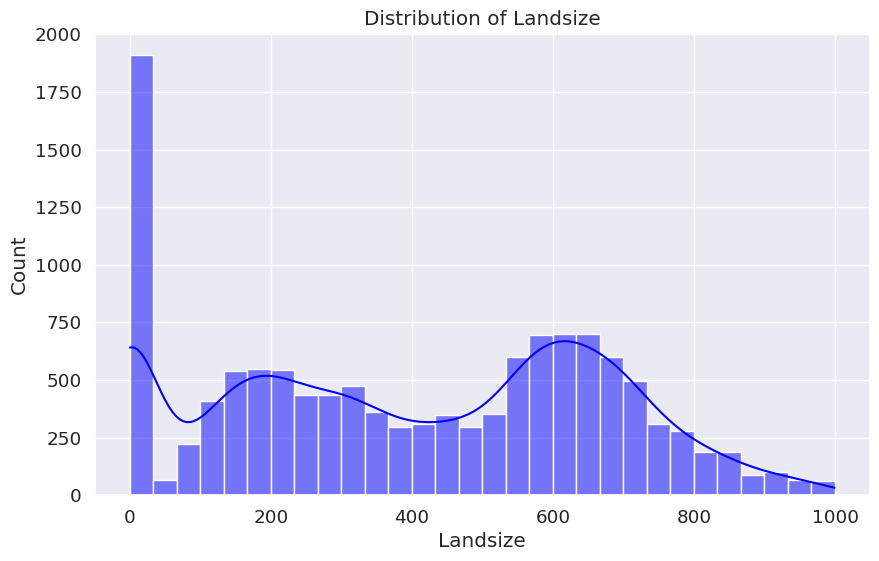

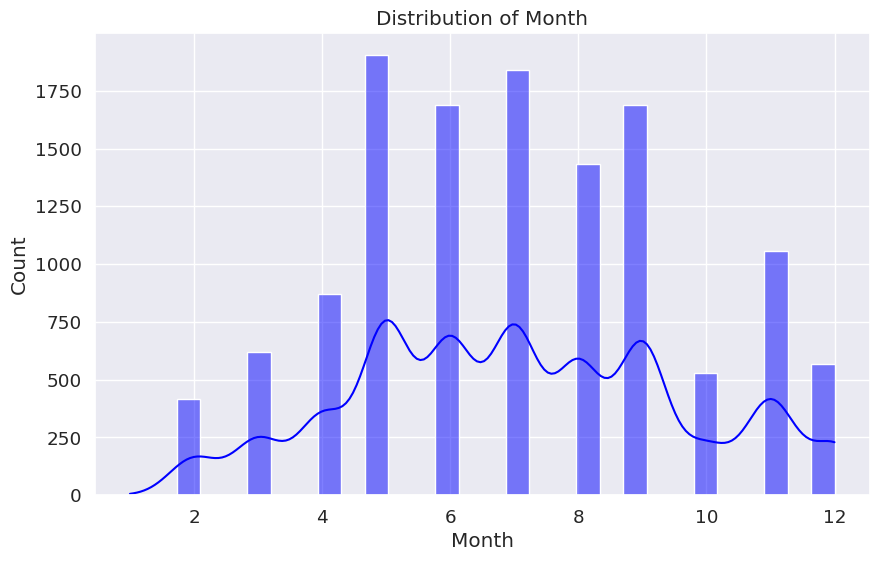

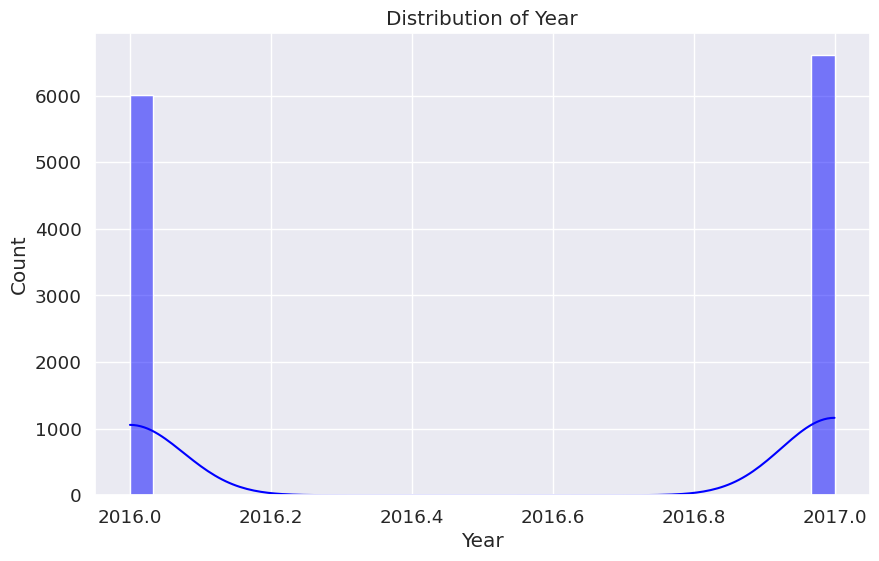

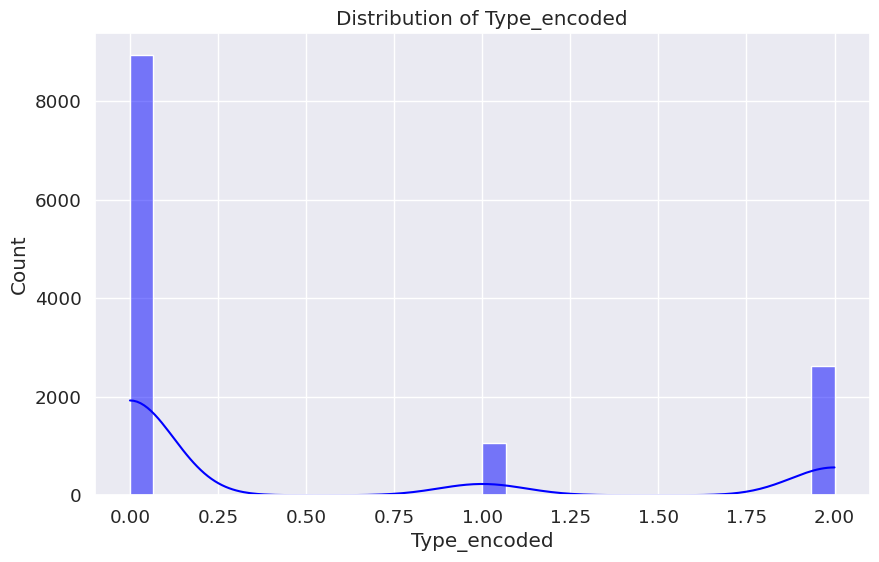

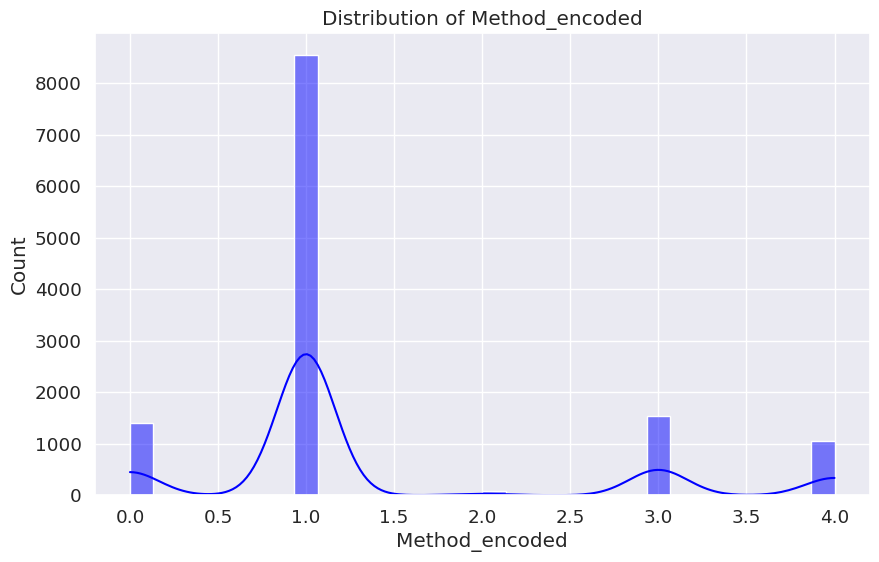

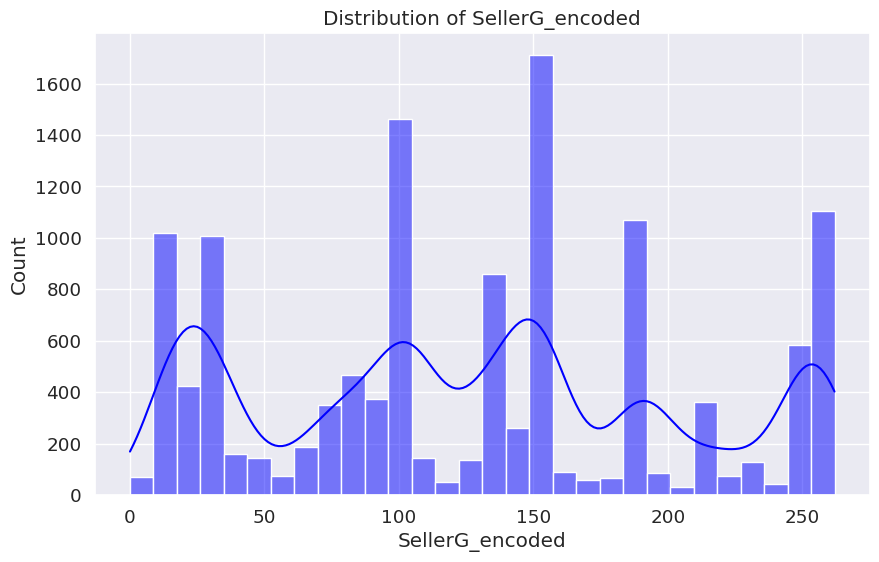

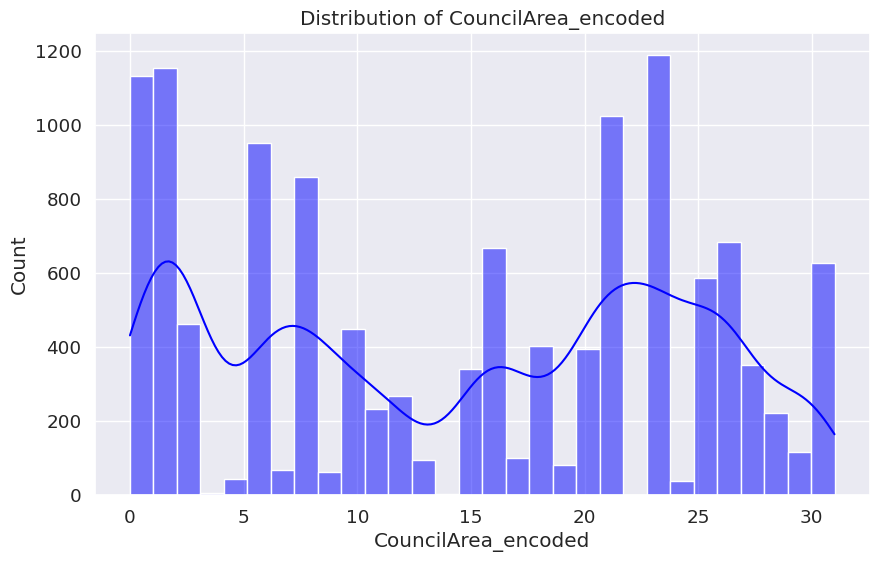

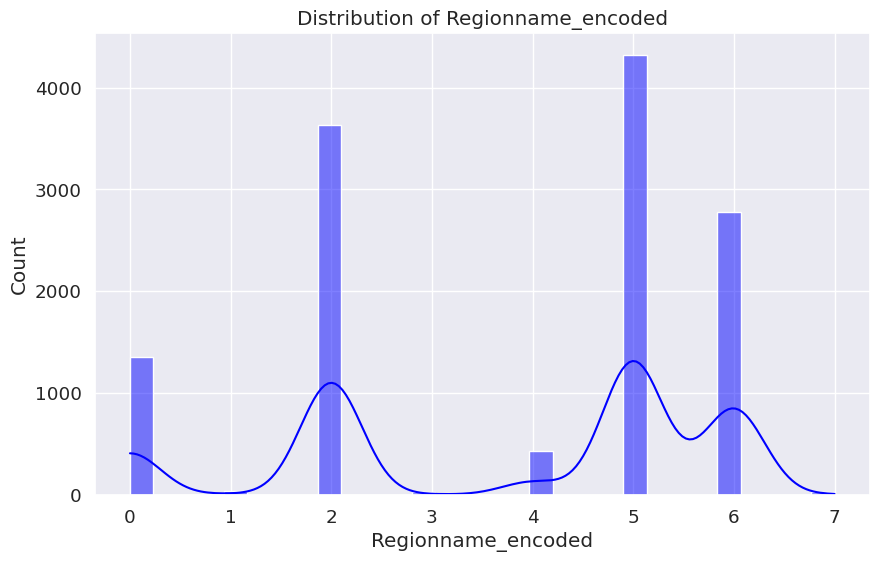

In [44]:
num_features = ['LogPrice','Price','Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','Month','Year','Type_encoded', 'Method_encoded',
       'SellerG_encoded', 'CouncilArea_encoded', 'Regionname_encoded']
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

## Distribution of Categorical Data

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname', 'YearMonth'],
      dtype='object')


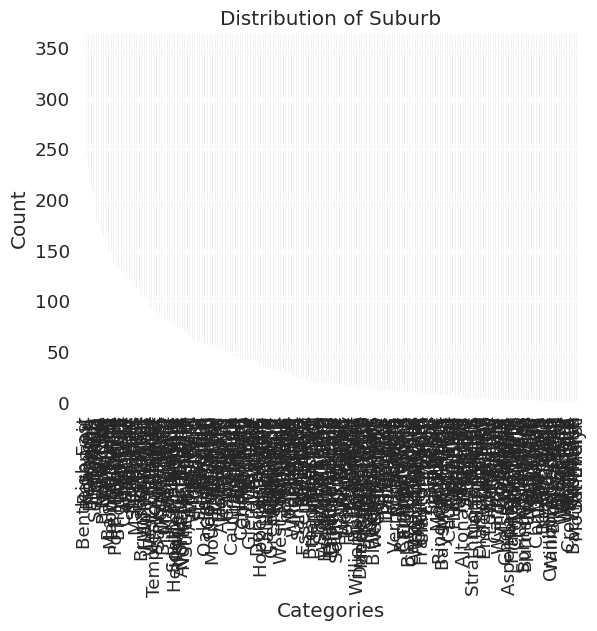

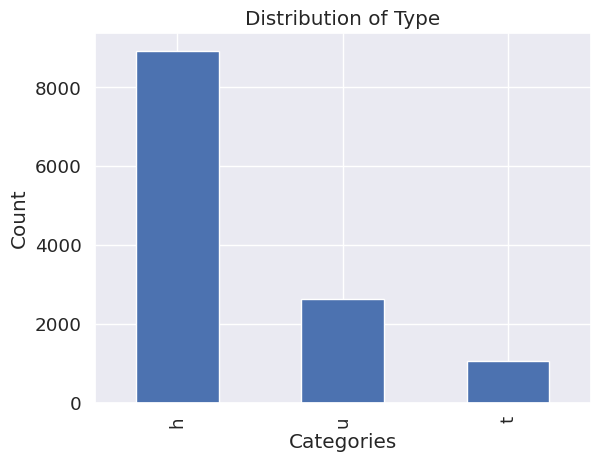

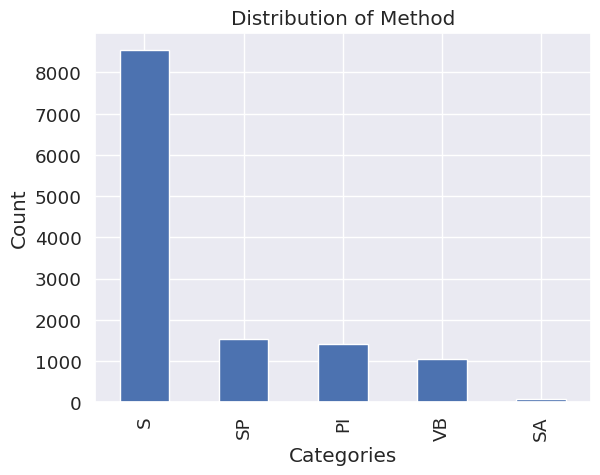

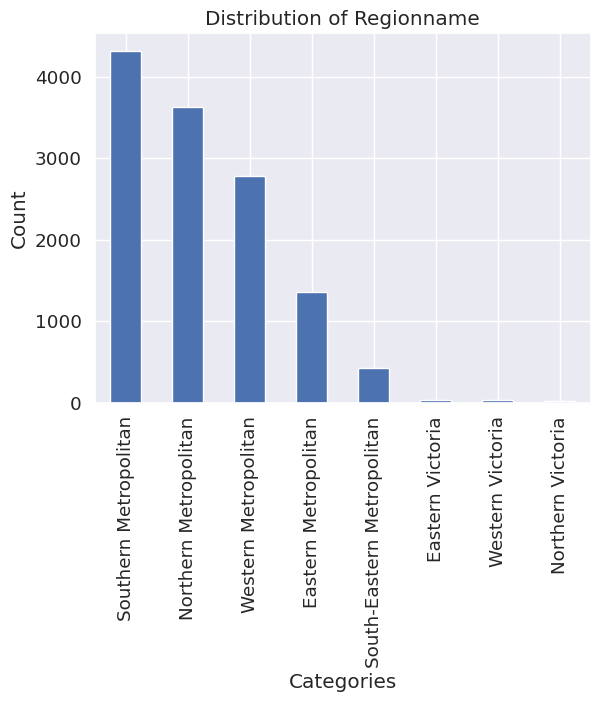

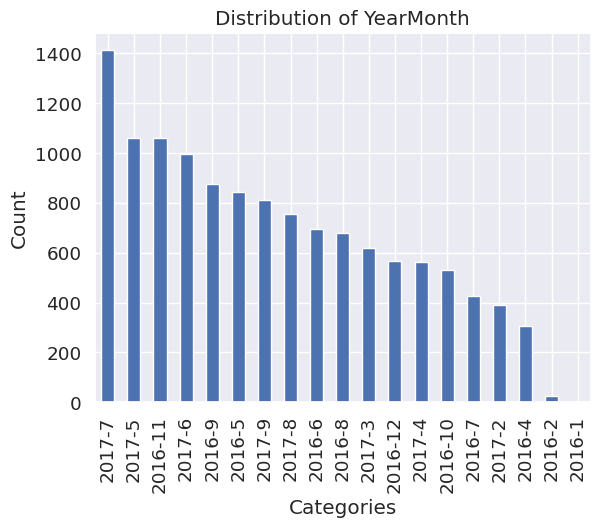

In [45]:
#Columns of 'object' type
categorical_cols=data.select_dtypes(include=['object']).columns
print(categorical_cols)

for var in categorical_cols:
  if var not in ['Address','SellerG','CouncilArea']:
    data[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

## Box-plots of 'Type' and 'Region

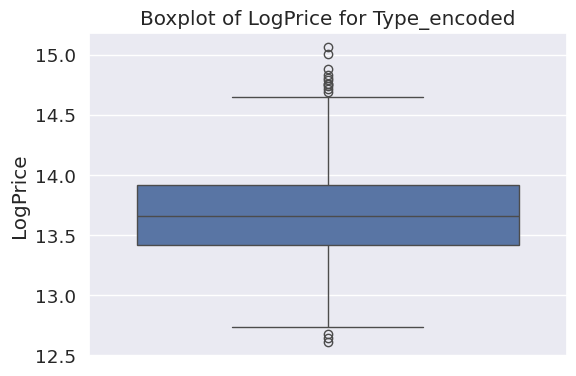

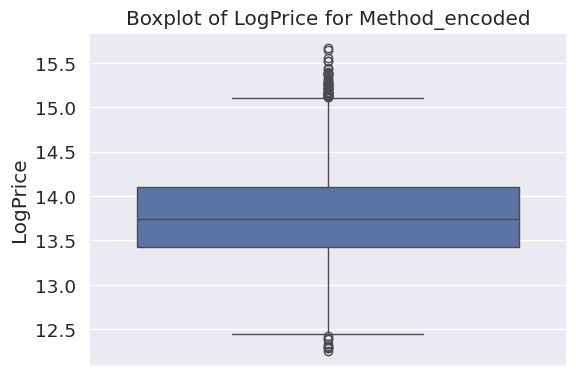

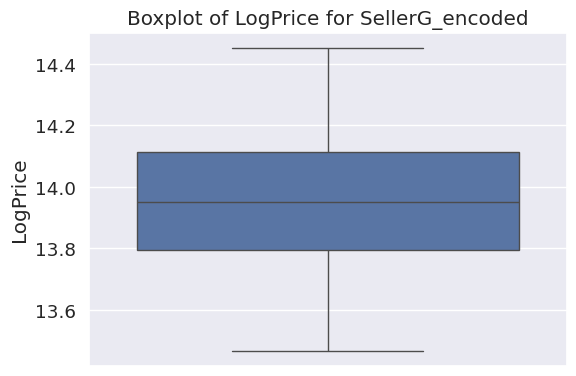

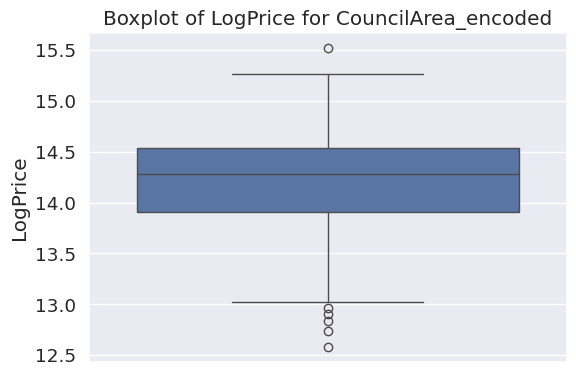

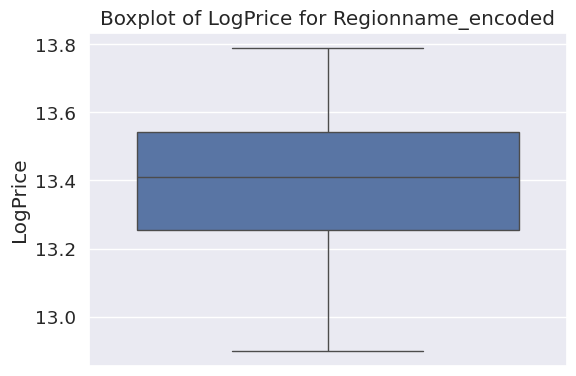

In [46]:
# List of binary columns to group by
binary_columns = [
    'Type_encoded', 'Method_encoded','SellerG_encoded', 'CouncilArea_encoded', 'Regionname_encoded'
]

# Loop through binary columns to create a boxplot for each
for col in binary_columns:
    # Filter the rows where the binary column value is 1
    filtered_data = data[data[col] == 1]

    # Check if there is data to plot
    if not filtered_data.empty:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=filtered_data['LogPrice'])
        plt.title(f'Boxplot of LogPrice for {col}')
        plt.ylabel('LogPrice')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {col} (all values are 0).")

## Price and LogPrice Grouped by Month and Year

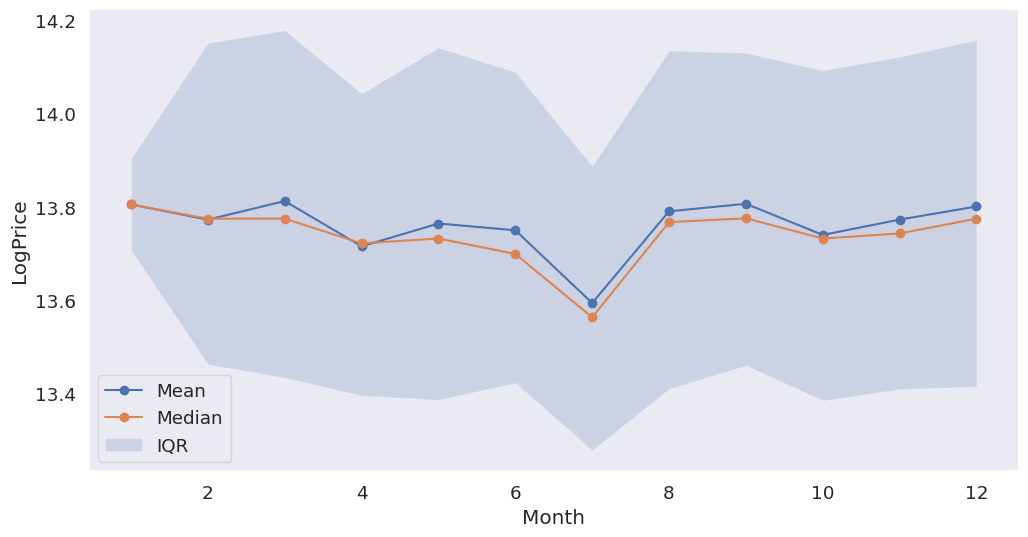

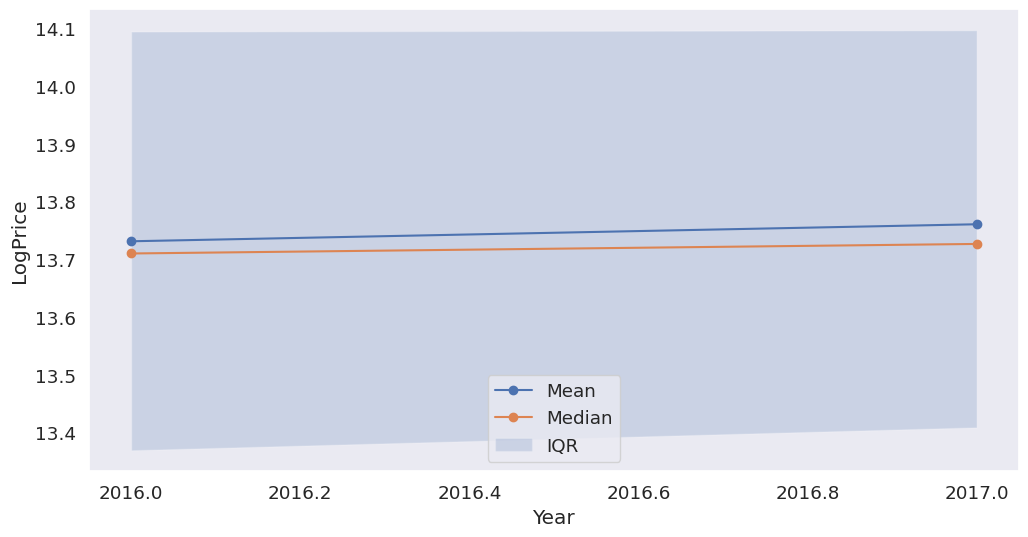

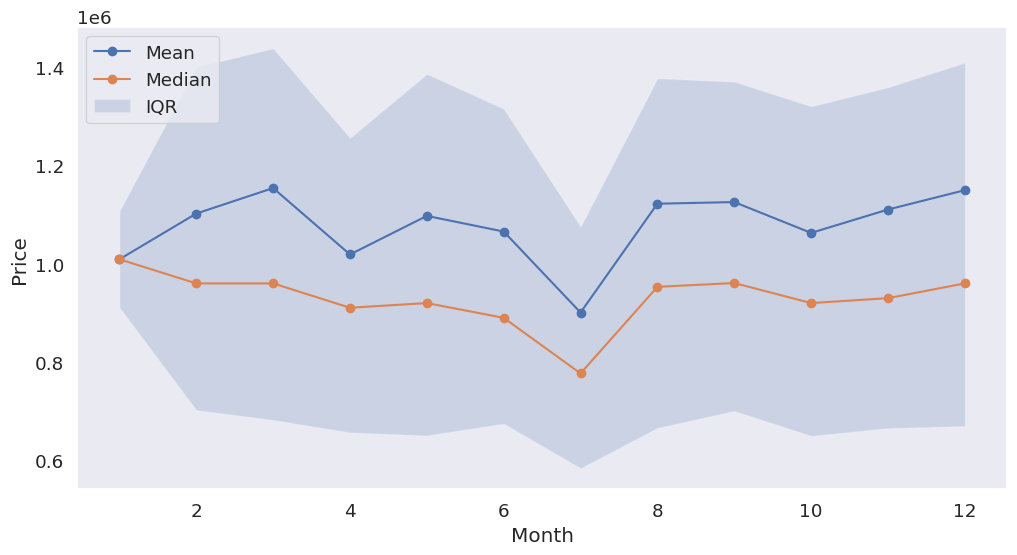

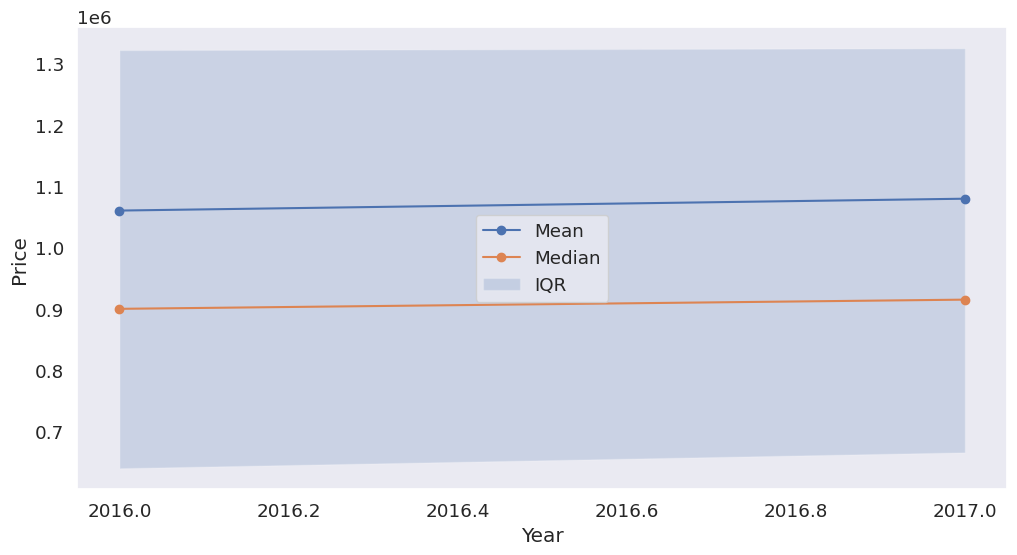

In [47]:
for col in ['LogPrice','Price']:
  # Group by Month and compute descriptive statistics
  month_stats = data.groupby('Month')[col].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
  month_stats.columns = ['Mean', 'Median', 'Q1', 'Q3']
  month_stats['IQR'] = month_stats['Q3'] - month_stats['Q1']

  # Plot for Month
  plt.figure(figsize=(12, 6))
  plt.plot(month_stats.index, month_stats['Mean'], label='Mean', marker='o')
  plt.plot(month_stats.index, month_stats['Median'], label='Median', marker='o')
  plt.fill_between(month_stats.index, month_stats['Q1'], month_stats['Q3'], alpha=0.2, label='IQR')
  # plt.title(f'{col} Statistics Grouped by Month')
  plt.xlabel('Month')
  plt.ylabel(f'{col}')
  plt.legend()
  plt.grid()

  plt.savefig(f'IMAGES/{col}_grouped_month.png', dpi=300, bbox_inches='tight')

  plt.show()

  # Group by Year and compute descriptive statistics
  year_stats = data.groupby('Year')[col].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
  year_stats.columns = ['Mean', 'Median', 'Q1', 'Q3']
  year_stats['IQR'] = year_stats['Q3'] - year_stats['Q1']

  # Plot for Year
  plt.figure(figsize=(12, 6))
  plt.plot(year_stats.index, year_stats['Mean'], label='Mean', marker='o')
  plt.plot(year_stats.index, year_stats['Median'], label='Median', marker='o')
  plt.fill_between(year_stats.index, year_stats['Q1'], year_stats['Q3'], alpha=0.2, label='IQR')

  # plt.title(f'{col} Statistics Grouped by Year')
  plt.xlabel('Year')
  plt.ylabel(f'{col}')
  plt.legend()
  plt.grid()

  plt.savefig(f'IMAGES/{col}_grouped_year.png', dpi=300, bbox_inches='tight')

  plt.show()

### Average price per month and year

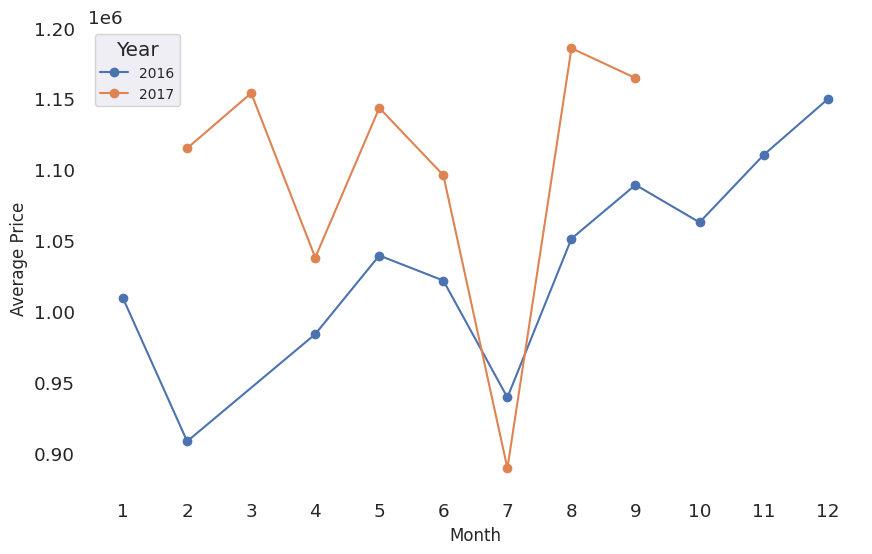

In [48]:
# Convert 'Year' and 'Month' columns to string for combined x-axis labeling
data['YearMonth'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)

# Group the data by Year and Month, calculating the average price per month for each year
monthly_price_trend = data.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Create the plot with a white background
fig, ax = plt.subplots(figsize=(10, 6))

# Set white background for the figure and axes
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Iterate over each unique year and plot the trend for that year
for year in monthly_price_trend['Year'].unique():
    year_data = monthly_price_trend[monthly_price_trend['Year'] == year]
    ax.plot(year_data['Month'], year_data['Price'], marker='o', label=str(year))

# Add titles and labels
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_xticks(range(1, 13))  # Ensure months are shown from 1 to 12
ax.legend(title="Year", fontsize=10)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Save the plot with a white background
plt.savefig('IMAGES/avg_price_trend_monthly.png', dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot
plt.show()

In [49]:
print(data.shape)

(12614, 35)


In [50]:
month_7=data[data['Month']==7]
month_7[['Price','LogPrice']].describe()

Price     LogPrice
count  1.839000e+03  1839.000000
mean   9.007848e+05    13.593839
std    5.080742e+05     0.470442
min    1.700000e+05    12.043554
25%    5.842500e+05    13.278083
50%    7.770000e+05    13.563196
75%    1.075500e+06    13.888296
max    9.000000e+06    16.012735

## Total Sales and Total Transctions for Month and Year

<Figure size 1400x800 with 0 Axes>

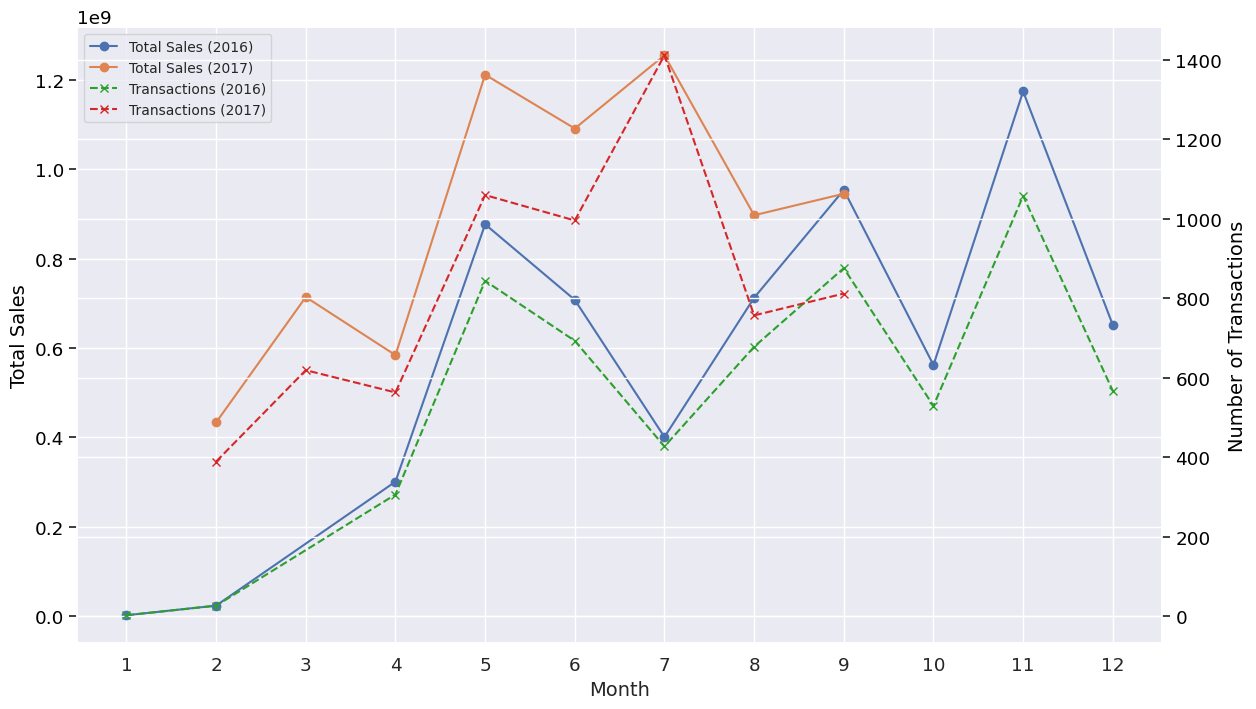

In [51]:
# Group the data by Year and Month, calculating the sum of sales and the number of transactions
monthly_sales = data.groupby(['Year', 'Month']).agg(
    total_sales=('Price', 'sum'),   # Sum of prices
    transaction_count=('Price', 'count')  # Count of rows
).reset_index()

# Plotting the trends
plt.figure(figsize=(14, 8))

# Create the primary y-axis for total sales
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total sales for each year
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    ax1.plot(year_data['Month'], year_data['total_sales'], marker='o', label=f"Total Sales ({year})")

# Customize the first axis
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Total Sales', fontsize=14, color='black')  # Axis label in black
ax1.tick_params(axis='y', labelcolor='black')  # Tick labels in black
ax1.set_xticks(range(1, 13))
# ax1.set_title('Monthly Total Sales and Number of Transactions Across Years', fontsize=16)
ax1.grid(True)

# Create the secondary y-axis for number of transactions
ax2 = ax1.twinx()

# Plot transaction count for each year
for year in [2016, 2017]:  # Ensure years are integers to match the data type
    colo = 'tab:green' if year == 2016 else 'tab:red'  # Assign colors based on the year
    year_data = monthly_sales[monthly_sales['Year'] == year]
    ax2.plot(year_data['Month'], year_data['transaction_count'], marker='x', linestyle='--', label=f"Transactions ({year})", color=colo)

# Customize the second axis
ax2.set_ylabel('Number of Transactions', fontsize=14, color='black')  # Axis label in black
ax2.tick_params(axis='y', labelcolor='black')  # Tick labels in black

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# Save the plot
plt.savefig('IMAGES/monthly_sales_transactions.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [52]:
print(data[(data['Year']==2017) & (data['Month']==1)])

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount, LogPrice, Year, Month, YearMonth, Week, Rooms/Distance, Distance^2, LogDistance, LogRooms, Suburb_encoded, Address_encoded, Type_encoded, Method_encoded, SellerG_encoded, CouncilArea_encoded, Regionname_encoded]
Index: []

[0 rows x 35 columns]


## Other Investigations

In [53]:
data[data['CouncilArea'].isin(['Moreland','Boroondara','Monee Valley'])]

Suburb          Address  Rooms Type    Price Method    SellerG  \
370       Ashburton       61 Dent St      4    h  2650000      S   Marshall   
371       Ashburton     69 Albion Rd      3    h  1670000      S     Jellis   
372       Ashburton  1/17 Ashburn Gr      3    t   955000      S     Buxton   
373       Ashburton   3/39 Solway St      3    t  2050000      S  Fletchers   
374       Ashburton  101/218 High St      2    u   500000     VB  Fletchers   
...             ...              ...    ...  ...      ...    ...        ...   
13470           Kew      4 Second Av      3    h  2200000      S     Jellis   
13511      Oak Park     18 Jessie St      2    h  1006000      S  Stockdale   
13519   Pascoe Vale         1 Ann St      4    h  1260000      S      Eview   
13554  Surrey Hills     46 Durham Rd      3    h  1715000      S       Noel   
13555  Surrey Hills         3 Oak St      4    h  3100000     VB   Marshall   

            Date  Distance  Postcode  ...  Distance^2  LogDistance  LogRooms  \
370   2016-09-03      11.0      3147  ...      121.00     2.397895  1.386294   
371   2016-12-03      11.0      3147  ...      121.00     2.397895  1.098612   
372   2016-12-03      11.0      3147  ...      121.00     2.397895  1.098612   
373   2016-12-03      11.0      3147  ...      121.00     2.397895  1.098612   
374   2017-03-04      11.0      3147  ...      121.00     2.397895  0.693147   
...          ...       ...       ...  ...         ...          ...       ...   
13470 2017-08-26       5.4      3101  ...       29.16     1.686399  1.098612   
13511 2017-08-26      11.2      3046  ...      125.44     2.415914  0.693147   
13519 2017-08-26       8.5      3044  ...       72.25     2.140066  1.386294   
13554 2017-08-26      10.2      3127  ...      104.04     2.322388  1.098612   
13555 2017-08-26      10.2      3127  ...      104.04     2.322388  1.386294   

       Suburb_encoded Address_encoded  Type_encoded  Method_encoded  \
370                13           10568             0               1   
371                13           10850             0               1   
372                13             372             1               1   
373                13            6716             1               1   
374                13            1151             2               4   
...               ...             ...           ...             ...   
13470             164            8083             0               1   
13511             211            3449             0               1   
13519             220               5             0               1   
13554             261            8923             0               1   
13555             261            6366             0               4   

      SellerG_encoded  CouncilArea_encoded  Regionname_encoded  
370               131                    2                   5  
371               104                    2                   5  
372                32                    2                   5  
373                72                    2                   5  
374                72                    2                   5  
...               ...                  ...                 ...  
13470             104                    2                   5  
13511             217                   23                   2  
13519              69                   23                   2  
13554             157                    2                   5  
13555             131                    2                   5  

[2341 rows x 35 columns]

In [54]:
data[data['Regionname'].isin(['Western Metropolitan','Southern Metropolitan','Northern Metropolitan'])]

Suburb           Address  Rooms Type    Price Method   SellerG  \
0        Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1        Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2        Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3        Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4        Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...             ...               ...    ...  ...      ...    ...       ...   
13574   Westmeadows        9 Black St      3    h   582000      S       Red   
13576  Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577  Williamstown       83 Power St      3    h  1170000      S     Raine   
13578  Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579    Yarraville        6 Agnes St      4    h  1285000     SP   Village   

            Date  Distance  Postcode  ...  Distance^2  LogDistance  LogRooms  \
0     2016-12-03       2.5      3067  ...        6.25     0.916291  0.693147   
1     2016-02-04       2.5      3067  ...        6.25     0.916291  0.693147   
2     2017-03-04       2.5      3067  ...        6.25     0.916291  1.098612   
3     2017-03-04       2.5      3067  ...        6.25     0.916291  1.098612   
4     2016-06-04       2.5      3067  ...        6.25     0.916291  1.386294   
...          ...       ...       ...  ...         ...          ...       ...   
13574 2017-08-26      16.5      3049  ...      272.25     2.803360  1.098612   
13576 2017-08-26       6.8      3016  ...       46.24     1.916923  1.098612   
13577 2017-08-26       6.8      3016  ...       46.24     1.916923  1.098612   
13578 2017-08-26       6.8      3016  ...       46.24     1.916923  1.386294   
13579 2017-08-26       6.3      3013  ...       39.69     1.840550  1.386294   

       Suburb_encoded Address_encoded  Type_encoded  Method_encoded  \
0                   0           11995             0               1   
1                   0            5547             0               1   
2                   0            9204             0               3   
3                   0            8451             0               0   
4                   0            9925             0               4   
...               ...             ...           ...             ...   
13574             287           12114             0               1   
13576             291           11475             0               3   
13577             291           11946             0               1   
13578             291           12472             0               0   
13579             299           10102             0               3   

      SellerG_encoded  CouncilArea_encoded  Regionname_encoded  
0                  23                   30                   2  
1                  23                   30                   2  
2                  23                   30                   2  
3                  23                   30                   2  
4                 151                   30                   2  
...               ...                  ...                 ...  
13574             196                   11                   2  
13576             247                   10                   6  
13577             190                   10                   6  
13578             218                   10                   6  
13579             235                   16                   6  

[10728 rows x 35 columns]

# Model: KNN

## KNN with LogPrice

In [58]:
# df_encoded=pd.read_csv('encoded_housing.csv')
# df_encoded.columns

Counting Unique values for each column

In [59]:
# print(df_encoded.nunique())

Suburb             300
Address          12535
Rooms                9
Type                 3
Price             2129
Method               5
SellerG            263
Date                58
Distance           195
Postcode           189
Bedroom2            11
Bathroom             9
Car                 11
Landsize           960
CouncilArea         32
Lattitude         6178
Longtitude        6701
Regionname           8
Propertycount      297
LogPrice          2129
Year                 2
Month               12
YearMonth           19
Week                 4
dtype: int64


In [60]:
print(df_encoded.shape)
#Only removing Landsize and Duplicates

(12614, 24)


In [61]:
# Fix TensorFlow randomness (if used by any dependency)
tf.random.set_seed(42)

# Set environment variables to force single-threaded execution
os.environ["PYTHONHASHSEED"] = "42"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Set random seeds for full reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Step 1: Convert and sort by Date
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'], format='%d/%m/%Y', errors='coerce')
df_encoded.sort_values(by=['Date'], inplace=True)

# Step 2: Remove outliers in Landsize from the entire dataset
outlier_threshold = 1000  # Set threshold for Landsize
print(f"Total observations before outlier removal: {len(df_encoded)}")
df_encoded = df_encoded[df_encoded['Landsize'] <= outlier_threshold]
print(f"Total observations after outlier removal: {len(df_encoded)}")

# Step 3: Define features and target
features_without_BA = [
    'Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
    'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'CouncilArea',
    'Regionname', 'Propertycount', 'Year', 'Month', 'Week'
]
target_without_BA = 'LogPrice'

# Split data into training and testing sets based on time
train_size_without_BA = int(len(df_encoded) * 0.8)  # 80% for training, 20% for testing
X_without_BA = df_encoded[features_without_BA]
y_without_BA = df_encoded[target_without_BA]
X_train_without_BA, X_test_without_BA = X_without_BA.iloc[:train_size_without_BA], X_without_BA.iloc[train_size_without_BA:]
y_train_without_BA, y_test_without_BA = y_without_BA.iloc[:train_size_without_BA], y_without_BA.iloc[train_size_without_BA:]

# Step 4: Frequency encoding for specific columns
freq_encoded_cols_without_BA = ['Suburb', 'SellerG', 'CouncilArea']
onehot_encoded_cols_without_BA = ['Type', 'Method', 'Regionname', 'Year', 'Month', 'Week']
numerical_cols_without_BA = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

def frequency_encode_global(df_train, df_test, col, full_df):
    freq_map = full_df[col].value_counts(normalize=True)  # Use the full dataset for consistent mapping
    return df_train[col].map(freq_map), df_test[col].map(freq_map)

for col in freq_encoded_cols_without_BA:
    X_train_without_BA.loc[:, col], X_test_without_BA.loc[:, col] = frequency_encode_global(
        X_train_without_BA, X_test_without_BA, col, X_without_BA
    )

# Step 5: Preprocessing and pipeline
onehot_preprocessor_without_BA = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_preprocessor_without_BA = StandardScaler()

preprocessor_without_BA = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor_without_BA, numerical_cols_without_BA + freq_encoded_cols_without_BA),
        ('cat', onehot_preprocessor_without_BA, onehot_encoded_cols_without_BA)
    ]
)

feature_selection = SelectKBest(score_func=f_regression)

pipeline_without_BA = Pipeline([
    ('preprocessor', preprocessor_without_BA),
    ('feature_selection', feature_selection),
    ('knn', KNeighborsRegressor(algorithm='brute'))
])

# Step 6: Define hyperparameter search space
search_space_without_BA = {
    'feature_selection__k': (3, len(features_without_BA)),
    'knn__n_neighbors': (1, 200),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting scheme
    'knn__metric': ['euclidean', 'manhattan'],  # Distance metrics
}

# Step 7: Use TimeSeriesSplit for cross-validation
tscv_without_BA = TimeSeriesSplit(n_splits=7)

# Step 8: Bayesian search with fixed random_state
bayes_search_without_BA = BayesSearchCV(
    estimator=pipeline_without_BA,
    search_spaces=search_space_without_BA,
    cv=tscv_without_BA,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    n_jobs=1,
    verbose=1,
    random_state=SEED
)

# Fit the model
bayes_search_without_BA.fit(X_train_without_BA, y_train_without_BA)

# Step 9: Evaluate the best model
best_model_without_BA = bayes_search_without_BA.best_estimator_
y_pred_without_BA = best_model_without_BA.predict(X_test_without_BA)

# Metrics
mae_without_BA = mean_absolute_error(y_test_without_BA, y_pred_without_BA)
mse_without_BA = mean_squared_error(y_test_without_BA, y_pred_without_BA)
rmse_without_BA = np.sqrt(mse_without_BA)
r2_without_BA = r2_score(y_test_without_BA, y_pred_without_BA)

# Extract selected features
preprocessor_without_BA = best_model_without_BA.named_steps['preprocessor']
numerical_feature_names_without_BA = numerical_cols_without_BA + freq_encoded_cols_without_BA
categorical_feature_names_without_BA = preprocessor_without_BA.named_transformers_['cat'].get_feature_names_out(onehot_encoded_cols_without_BA)
all_feature_names_without_BA = np.array(numerical_feature_names_without_BA + list(categorical_feature_names_without_BA))

selected_features_mask_without_BA = best_model_without_BA.named_steps['feature_selection'].get_support()
selected_features_without_BA = all_feature_names_without_BA[selected_features_mask_without_BA]

print("\nBest Hyperparameters:", bayes_search_without_BA.best_params_)
print("\nSelected Features from SelectKBest:")
print(selected_features_without_BA)
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_without_BA:.2f}")
print(f"Mean Squared Error (MSE): {mse_without_BA:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_without_BA:.2f}")
print(f"R² Score: {r2_without_BA:.4f}")

Total observations before outlier removal: 12614
Total observations after outlier removal: 12614
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Fitting 7 folds fo

# Linear Model

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Example DataFrame assumed to be named 'df_encoded' with 'Price' as target
# and 'Date' column to sort chronologically:
# df_encoded = pd.read_csv("...")  # or however you load your data
# Make sure 'df_encoded' has the columns mentioned below

# Step 1: Convert and sort by Date
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'], format='%d/%m/%Y', errors='coerce')
df_encoded.sort_values(by=['Date'], inplace=True)

# Step 2: Define features and target
features_without_BA = [
    'Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
    'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'CouncilArea',
    'Regionname', 'Propertycount', 'Year', 'Month', 'Week'
]
target_without_BA = 'LogPrice'

# Split data into training and testing sets based on time
train_size_without_BA = int(len(df_encoded) * 0.8)  # 80% for training, 20% for testing
X_without_BA = df_encoded[features_without_BA]
y_without_BA = df_encoded[target_without_BA]

X_train_without_BA, X_test_without_BA = (
    X_without_BA.iloc[:train_size_without_BA],
    X_without_BA.iloc[train_size_without_BA:]
)
y_train_without_BA, y_test_without_BA = (
    y_without_BA.iloc[:train_size_without_BA],
    y_without_BA.iloc[train_size_without_BA:]
)

# Separate categorical and numerical columns
freq_encoded_cols_without_BA = ['Suburb', 'SellerG', 'CouncilArea']
onehot_encoded_cols_without_BA = ['Type', 'Method', 'Regionname', 'Year', 'Month', 'Week']
numerical_cols_without_BA = [
    'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
    'Landsize', 'Propertycount'
]

# Step 3: Frequency encoding for specific columns
def frequency_encode(df, col):
    freq_map = df[col].value_counts(normalize=True)
    return df[col].map(freq_map)

# Make copies of X_train and X_test before frequency encoding
X_train_without_BA = X_train_without_BA.copy()
X_test_without_BA = X_test_without_BA.copy()

for col in freq_encoded_cols_without_BA:
    X_train_without_BA[col] = frequency_encode(X_train_without_BA, col)
    X_test_without_BA[col] = frequency_encode(X_test_without_BA, col)

# Preprocessing for one-hot encoded columns
onehot_preprocessor_without_BA = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor_without_BA = StandardScaler()

preprocessor_without_BA = ColumnTransformer(
    transformers=[
        # Apply standard scaling to both numerical columns and freq-encoded columns
        ('num', numerical_preprocessor_without_BA, numerical_cols_without_BA + freq_encoded_cols_without_BA),
        # Apply one-hot encoding to the designated categorical columns
        ('cat', onehot_preprocessor_without_BA, onehot_encoded_cols_without_BA)
    ]
)

# ------------------------------------------------------------------
#  LINEAR REGRESSION PIPELINE + SELECTED FEATURES
# ------------------------------------------------------------------

# Create a pipeline for Linear Regression using the same preprocessor
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor_without_BA),
    # Here, we select ALL features for demonstration; you can use fewer (e.g., k=14)
    # if you want to match your best KNN's feature count.
    ('feature_selection', SelectKBest(score_func=f_regression, k=len(features_without_BA))),
    ('linear_regression', LinearRegression())
])

# Fit the Linear Regression pipeline
pipeline_lr.fit(X_train_without_BA, y_train_without_BA)

# Predict on the test set
y_pred_lr = pipeline_lr.predict(X_test_without_BA)

# Calculate metrics for Linear Regression
mae_lr = mean_absolute_error(y_test_without_BA, y_pred_lr)
mse_lr = mean_squared_error(y_test_without_BA, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_without_BA, y_pred_lr)

# Print the results
print("\n=== Linear Regression Model Results ===")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

# -------------- Show which features were selected --------------
feature_selection_lr = pipeline_lr.named_steps['feature_selection']

# Reconstruct the feature names after preprocessing
# 1. Numerical + freq-encoded columns:
numerical_feature_names_lr = numerical_cols_without_BA + freq_encoded_cols_without_BA

# 2. Categorical (one-hot) columns:
cat_transformer_lr = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names_lr = cat_transformer_lr.get_feature_names_out(onehot_encoded_cols_without_BA)

all_feature_names_lr = np.array(numerical_feature_names_lr + list(cat_feature_names_lr))

# Boolean mask of which features survived
selected_features_mask_lr = feature_selection_lr.get_support()

# Selected features for the linear model
selected_features_lr = all_feature_names_lr[selected_features_mask_lr]

print("\nSelected Features from SelectKBest (Linear Regression):")
print(selected_features_lr)



=== Linear Regression Model Results ===
Mean Absolute Error (MAE): 0.23
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30
R² Score: 0.6428

Selected Features from SelectKBest (Linear Regression):
['Rooms' 'Distance' 'Postcode' 'Bedroom2' 'Bathroom' 'Car' 'Landsize'
 'SellerG' 'CouncilArea' 'Type_h' 'Type_u' 'Method_S' 'Method_SP'
 'Regionname_Northern Metropolitan' 'Regionname_Southern Metropolitan'
 'Regionname_Western Metropolitan' 'Month_7']


# Graphical Analysis of Models

**PDP**

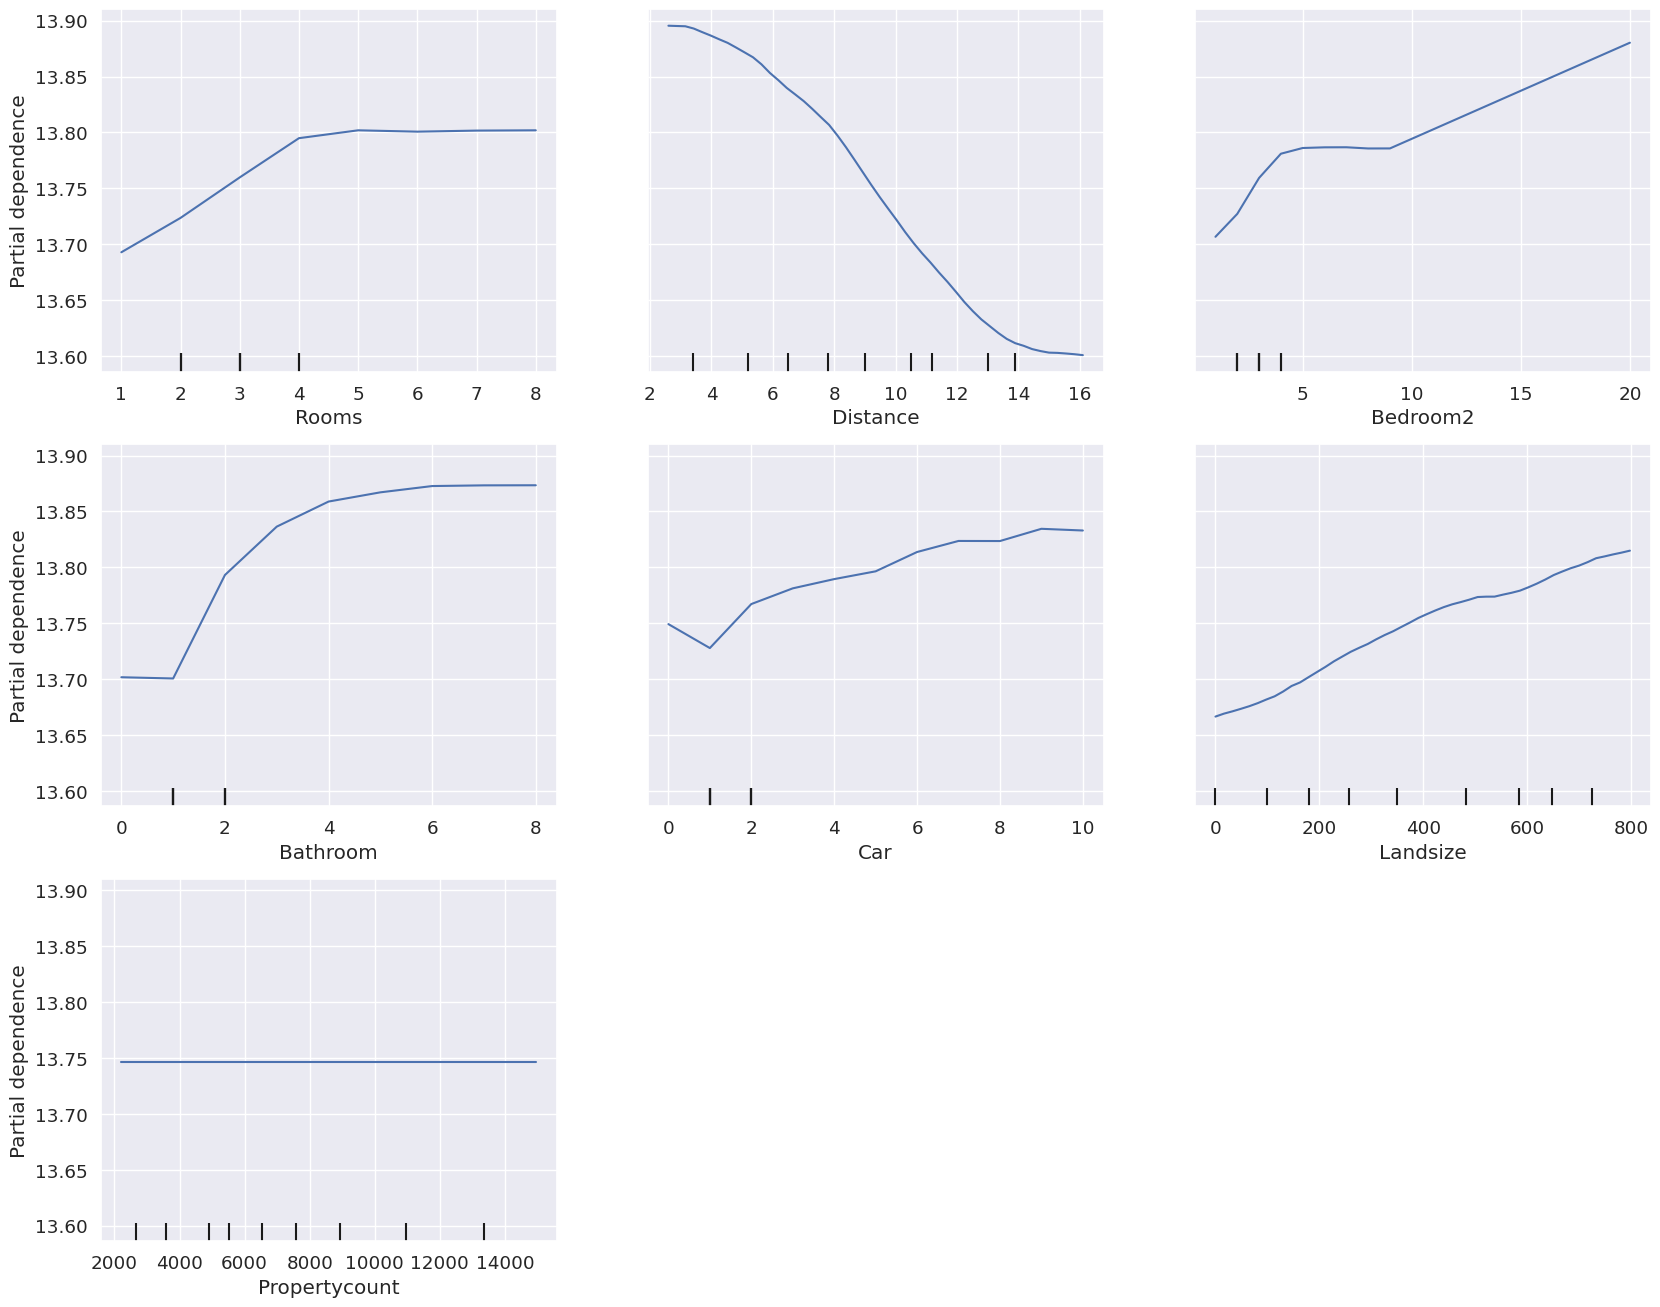

In [64]:
from sklearn.inspection import PartialDependenceDisplay

# Create PDP for the selected numerical features
numerical_features_to_plot = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

PartialDependenceDisplay.from_estimator(
    best_model_without_BA,
    X_train_without_BA,
    features=numerical_features_to_plot,
    grid_resolution=50,
    kind="average",
    n_jobs=-1
).figure_.set_size_inches(20, 16)  # Adjust figure size

plt.savefig(f'IMAGES/pdp_plot.png', dpi=300, bbox_inches='tight')

plt.show()


**Decision Boundaries and Regression with Numerical Features**

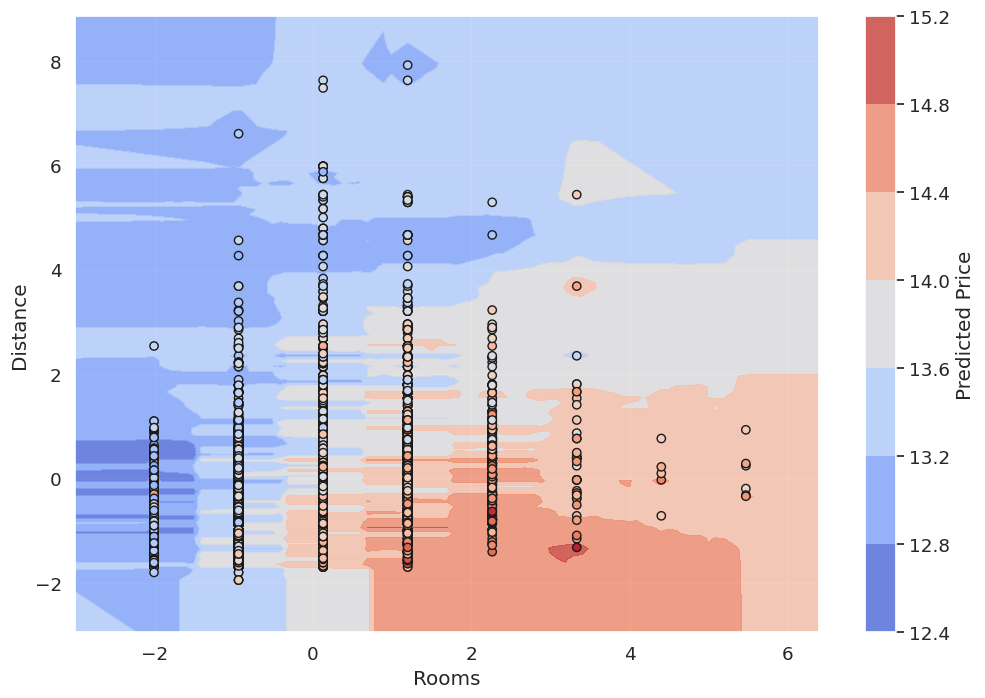

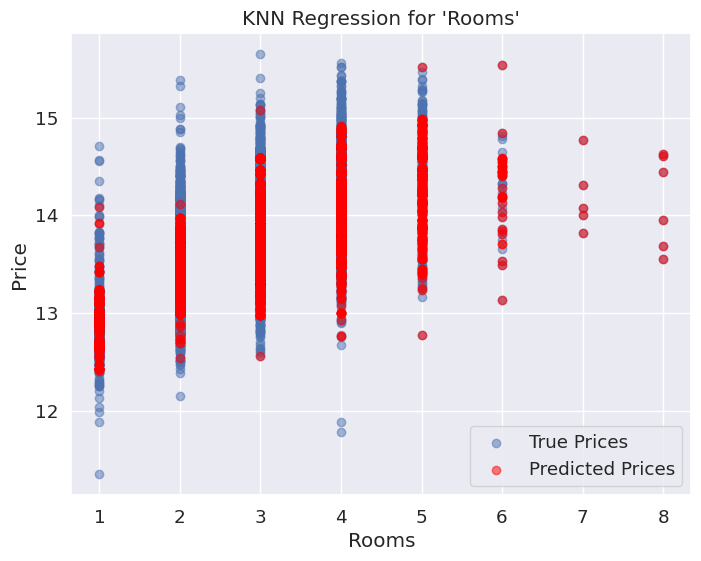

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Select numerical features to plot
numerical_features_to_plot = ['Rooms', 'Distance']  # You can choose other pairs as needed
X_train_plot = X_train_without_BA[numerical_features_to_plot]
y_train_plot = y_train_without_BA

# Step 2: Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_plot)

# Step 3: Fit a KNN model for visualization purposes
knn_visual = KNeighborsRegressor(
    n_neighbors=best_model_without_BA.named_steps['knn'].n_neighbors,
    weights=best_model_without_BA.named_steps['knn'].weights,
    metric=best_model_without_BA.named_steps['knn'].metric,
    p=best_model_without_BA.named_steps['knn'].p
)
knn_visual.fit(X_train_scaled, y_train_plot)

# Step 4: Create a mesh grid for decision boundary plotting
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Step 5: Predict over the grid
Z = knn_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot decision boundaries
plt.figure(figsize=(12, 8))
contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.colorbar(contour, label="Predicted Price")
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_plot, cmap='coolwarm', edgecolor='k')
# plt.title(f"KNN Regression Decision Boundaries for Numerical Features: {numerical_features_to_plot}")
plt.xlabel(numerical_features_to_plot[0])
plt.ylabel(numerical_features_to_plot[1])
plt.show()

# Step 7: Regression Visualization for a Single Numerical Feature (e.g., 'Rooms')
plt.figure(figsize=(8, 6))
plt.scatter(X_train_without_BA['Rooms'], y_train_without_BA, alpha=0.5, label="True Prices")
plt.scatter(X_train_without_BA['Rooms'], knn_visual.predict(scaler.transform(X_train_plot)), color='red', alpha=0.5, label="Predicted Prices")
plt.title("KNN Regression for 'Rooms'")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.legend()
plt.savefig(f'IMAGES/decision_boundaries.png', dpi=300, bbox_inches='tight')
plt.show()


**Distance vs Landsize**

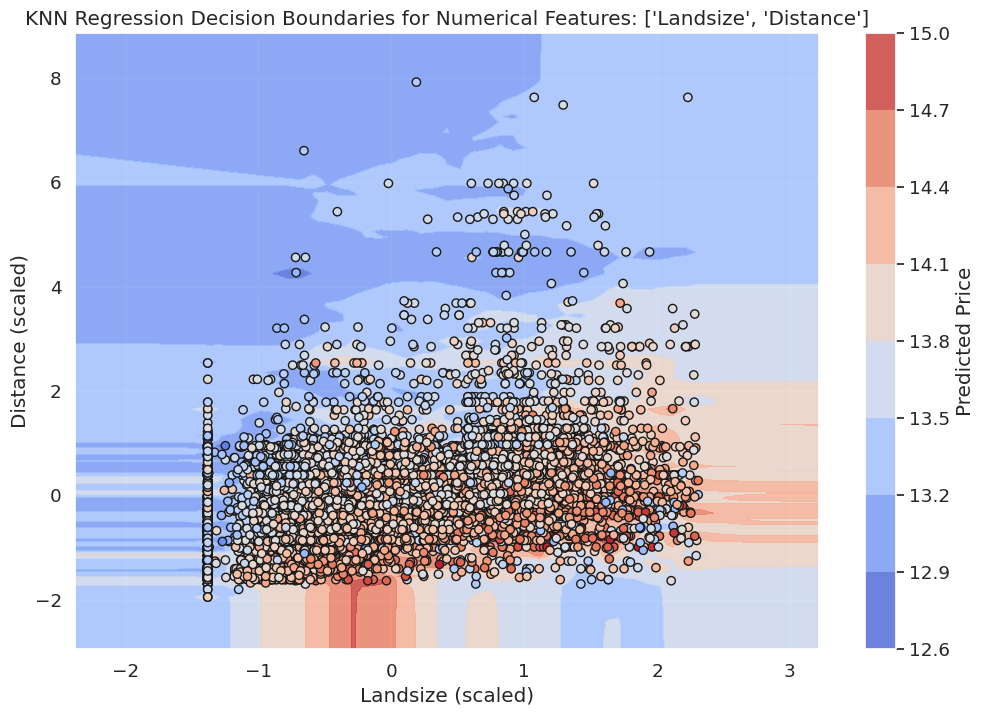

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Select numerical features to plot
numerical_features_to_plot = ['Landsize', 'Distance']  # Landsize on X-axis, Distance on Y-axis
X_train_plot = X_train_without_BA[numerical_features_to_plot]
y_train_plot = y_train_without_BA

# Step 2: Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_plot)

# Step 3: Fit a KNN model for visualization purposes
knn_visual = KNeighborsRegressor(
    n_neighbors=best_model_without_BA.named_steps['knn'].n_neighbors,
    weights=best_model_without_BA.named_steps['knn'].weights,
    metric=best_model_without_BA.named_steps['knn'].metric,
    p=best_model_without_BA.named_steps['knn'].p
)
knn_visual.fit(X_train_scaled, y_train_plot)

# Step 4: Create a mesh grid for decision boundary plotting
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Step 5: Predict over the grid
Z = knn_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot decision boundaries
plt.figure(figsize=(12, 8))
contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.colorbar(contour, label="Predicted Price")
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_plot, cmap='coolwarm', edgecolor='k')
plt.title("KNN Regression Decision Boundaries for Numerical Features: ['Landsize', 'Distance']")
plt.xlabel("Landsize (scaled)")
plt.ylabel("Distance (scaled)")
plt.show()